## Lab Assignment 2 - Multiclass classification
**Classification of Robots from their Conversation**

Jacob Wahyladi

Ethan Silver

Jay Sachar 

# Initialize General Packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Getting Started

In [2]:
# Load the conversation Data set 
conv_df = pd.read_csv(r"C:\Users\Jay\Documents\Github\MSE413-ML\Lab 2\Classification of Robots from their conversation sequence.csv")
print(conv_df.head(10))
X_data = conv_df.drop(columns=['Robot']) #Drop target variable
Y_data = conv_df['Robot'] #Set Y to be the target variable

   Robot   num1    num2     num3     num4      num5       num6       num7  \
0      1      2       5        2        5         6          2          1   
1      2   1747    1749     1751     1758      1765       1767       1772   
2      3  65056  195168  1561344  7806720  31226880  187361280  749445120   
3      4   2855    2860     2865     2870      2875       2880       2885   
4      5  11440   57200   286000  1430000   7150000   35750000  178750000   
5      1      4       9        5        4         8          6          6   
6      2   1487    1491     1498     1503      1512       1514       1518   
7      3  18850   18850   113100   452400    452400    1809600    3619200   
8      4   8962    8967     8972     8977      8982       8987       8992   
9      5   2870   14350    71750   358750   1793750    8968750   44843750   

           num8          num9         num10  
0  8.000000e+00  1.000000e+00  3.000000e+00  
1  1.774000e+03  1.783000e+03  1.785000e+03  
2  6.745006e+0

# 2. Decision Tree Classifier

In [3]:
#2.1 Split the dataset into training (80%) and test (20%). Consider random effects in splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) 

In [4]:
#2.3 Evaluate and discuss the performance of the model on the test set by providing the confusion matrix and metrics of classification (accuracy, sensitivity, specificity, and f1 score).

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def DT_metrics(y_test, x_test, x_train, y_train, depth):
    clf = DecisionTreeClassifier(max_depth=depth)
    # Train the decision tree
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_test) # Y_ decision tree_ predictions 

    DT_accuracy = accuracy_score(y_test, y_pred)
    DT_precision = precision_score(y_test, y_pred, average='macro')
    DT_recall = recall_score(y_test, y_pred, average='macro')
    DT_f1 = f1_score(y_test, y_pred, average='macro')
    DT_conf_matrix = confusion_matrix(y_test, y_pred,)
    DT_specificity = DT_conf_matrix[0,0] / (DT_conf_matrix[0,0] + DT_conf_matrix[0,1])


    print(f'Metrics for Depth = {depth}')
    print(f'Accuracy: {DT_accuracy}')
    print(f'Precision: {DT_precision}')
    print(f'Recall/Accuaracy: {DT_recall}')
    print(f'F1-score: {DT_f1}')
    print(f'Confusion Matrix:\n{DT_conf_matrix}')
    print(f'Specificity: {DT_specificity}')

    return DT_accuracy, DT_precision, DT_recall, DT_f1, DT_conf_matrix, clf

In [5]:
#2.2 Train a decision tree classifier with default parameters and dept of 20, on the train set
DT_accuracy_depth_20, DT_precision_depth_20, DT_recall_depth_20, DT_f1_depth_20, DT_conf_matrix_depth_20, clf_depth_20 = DT_metrics(Y_test, X_test, X_train, Y_train, depth=20)

Metrics for Depth = 20
Accuracy: 0.78799
Precision: 0.8859308972880872
Recall/Accuaracy: 0.7883623531915342
F1-score: 0.7226019598907272
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    83     0 19944     0]
 [    0     1 18909     0  1256]
 [    0     0     0 20024     0]
 [    0     0     0     0 19874]]
Specificity: 1.0


In [6]:
# Investigate the effect of maximum depth on the accuracy of the model for the followingdepths: 1, 5, 10, 20, 50, and 100. Discuss the results.
DT_accuracy_depth_1, _, _, _, _, _ = DT_metrics(Y_test, X_test, X_train, Y_train, depth=1)
DT_accuracy_depth_5, _, _, _, _, _ = DT_metrics(Y_test, X_test, X_train, Y_train, depth=5)
DT_accuracy_depth_10, _, _, _, _, _ = DT_metrics(Y_test, X_test, X_train, Y_train, depth=10)
DT_accuracy_depth_50, _, _, _, _, _ = DT_metrics(Y_test, X_test, X_train, Y_train, depth=50)
DT_accuracy_depth_100, _, _, _, _, _ = DT_metrics(Y_test, X_test, X_train, Y_train, depth=100)



c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1
Accuracy: 0.39783
Precision: 0.24961912198349934
Recall/Accuaracy: 0.4
F1-score: 0.2795196061385484
Confusion Matrix:
[[19909     0     0     0     0]
 [    0     0     0     0 20027]
 [    1     0     0     0 20165]
 [    0     0     0     0 20024]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Depth = 5
Accuracy: 0.74146
Precision: 0.8325517267333179
Recall/Accuaracy: 0.7421159929188916
F1-score: 0.6745883365990133
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    11     0 20016     0]
 [    0     1 14976     0  5189]
 [    0     0     0 20024     0]
 [    0     0   648     0 19226]]
Specificity: 1.0
Metrics for Depth = 10
Accuracy: 0.77576
Precision: 0.8721202163028376
Recall/Accuaracy: 0.7762254359654531
F1-score: 0.7097088335909965
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    32     0 19995     0]
 [    0     1 17765     0  2400]
 [    0     0     0 20024     0]
 [    0     0    28     0 19846]]
Specificity: 1.0
Me

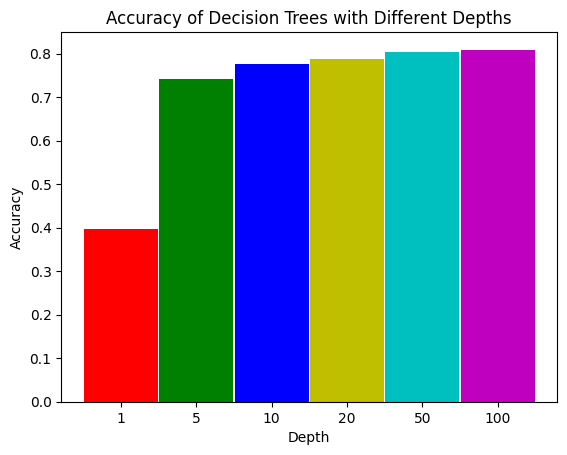

In [7]:
# Plot a bar graph comparing the depth to accuarcy
depths = [1, 5, 10, 20, 50, 100]
accuracies = [DT_accuracy_depth_1, DT_accuracy_depth_5, DT_accuracy_depth_10, DT_accuracy_depth_20, DT_accuracy_depth_50, DT_accuracy_depth_100]

colors = ['r', 'g', 'b', 'y', 'c', 'm']

bar_width = 0.98  # Width of each bar
index = np.arange(len(depths))  # Index for each depth
for i in range(len(depths)):
    plt.bar(index[i], accuracies[i], bar_width, label='Depth', color=colors[i])
# Add labels and title
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Trees with Different Depths')
plt.xticks(index, depths)  # Set x-ticks to be the depths

# Show the plot
plt.show()

# 3. Random Forest Classifier 

In [8]:
#3.1 Split the dataset into training (80%) and test set (20%). Consider random effects in splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) # Not sure how to consider random effects in splitting the data tbh


In [9]:
# Create a general function to train a Random Forest Classifier at different depths and estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def RF_metrics(y_test, x_test, x_train, y_train, depth, estimators):
    RF_clf = RandomForestClassifier(n_estimators = estimators,max_depth=depth)
    # Train the Random Forest tree
    RF_clf.fit(x_train, y_train)
    
    y_pred = RF_clf.predict(x_test) # Y_ decision tree_ predictions 

    RF_accuracy = accuracy_score(y_test, y_pred)
    RF_precision = precision_score(y_test, y_pred, average='macro')
    RF_recall = recall_score(y_test, y_pred, average='macro')
    RF_f1 = f1_score(y_test, y_pred, average='macro')
    RF_conf_matrix = confusion_matrix(y_test, y_pred,)
    RF_specificity = RF_conf_matrix[0,0] / (RF_conf_matrix[0,0] + RF_conf_matrix[0,1])

    print(f'Metrics for Depth = {depth} and Number of Estimators = {estimators}')
    print(f'Accuracy: {RF_accuracy}')
    print(f'Precision: {RF_precision}')
    print(f'Recall: {RF_recall}')
    print(f'F1-score: {RF_f1}')
    print(f'Confusion Matrix:\n{RF_conf_matrix}')
    print(f'Specificity: {RF_specificity}')

    return RF_accuracy, RF_precision, RF_recall, RF_f1, RF_conf_matrix, RF_clf, RF_clf.feature_importances_

In [27]:
#3.2 Train a random forest classifier on the train set with a number of estimators of 20 and a max depth of 20. 
#3.3 Evaluate and discuss the performance of the model on the test set by providing the confusion matrix and metrics of classification (accuarcy, sensisitivty, specificity, and f1 score)
RF_accuracy_est_20_depth_20, RF_precision_est_20_depth_20, RF_recall_est_20_depth_20, RF_f1_est_20_depth_20, RF_conf_matrix_est_20_depth_20, RF_clf_est_20_depth_20, RF_feature_importances_est_20_depth_20  = RF_metrics(Y_test, X_test, X_train, Y_train, depth=20, estimators=20)

Metrics for Depth = 20 and Number of Estimators = 20
Accuracy: 0.81042
Precision: 0.8108078604523211
Recall: 0.8106980840199922
F1-score: 0.8105168479609617
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10242     0  9785     0]
 [    0     1 19651     0   514]
 [    0  8658     0 11366     0]
 [    0     0     0     0 19874]]
Specificity: 1.0


In [28]:
# 3.4 Train different random forest classifiers with a number of estimators=[1, 10, 20,100] and maximum depths= [1, 5, 10, 20,100]

estimators = [1, 10, 20, 100]
max_depths = [1, 5, 10, 20, 100]

accuracy = {} 
results_dict = {}
for estimator in estimators:
    for depth in max_depths:
        # Call the RF_metrics function
        RF_accuracy, _, _, _, _, _, feature_importances = RF_metrics(Y_test, X_test, X_train, Y_train, depth, estimator)
        # Store the accuracy in the dictionary
        accuracy[f'RF_accuracy_est_{estimator}_depth_{depth}'] = RF_accuracy
        # Store feature importances in the dictionary
        results_dict[f'RF_feature_importances_est_{estimator}_depth_{depth}'] = feature_importances


c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 1
Accuracy: 0.39901
Precision: 0.16607466077900757
Recall: 0.4
F1-score: 0.2328367127713336
Confusion Matrix:
[[    0 19909     0     0     0]
 [    0 20027     0     0     0]
 [    0     2     0     0 20164]
 [    0 20024     0     0     0]
 [    0     0     0     0 19874]]
Specificity: 0.0


c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 5 and Number of Estimators = 1
Accuracy: 0.75173
Precision: 0.6599433329890843
Recall: 0.7523439471706562
F1-score: 0.6848215850330104
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 20027     0     0     0]
 [    0     1 15510     0  4655]
 [    0 20024     0     0     0]
 [    0     0   147     0 19727]]
Specificity: 1.0
Metrics for Depth = 10 and Number of Estimators = 1
Accuracy: 0.77338
Precision: 0.8761798722915561
Recall: 0.7738621738218882
F1-score: 0.7073465493652242
Confusion Matrix:
[[19909     0     0     0     0]
 [    0    35     0 19992     0]
 [    0     0 17545     2  2619]
 [    0     0     0 20024     0]
 [    0     0    49     0 19825]]
Specificity: 1.0
Metrics for Depth = 20 and Number of Estimators = 1
Accuracy: 0.79492
Precision: 0.8917210346528208
Recall: 0.7952407426397309
F1-score: 0.7305073326034333
Confusion Matrix:
[[19909     0     0     0     0]
 [    0   164     0 19863     0]
 [    0     0 19523     0   643]
 [    0     2 

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 10
Accuracy: 0.5981
Precision: 0.39927050561661986
Recall: 0.6
F1-score: 0.46602065897065953
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 20027     0     0     0]
 [    1     9     0     0 20156]
 [    0 20024     0     0     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Depth = 5 and Number of Estimators = 10
Accuracy: 0.76249
Precision: 0.7651908553666547
Recall: 0.7629629398668323
F1-score: 0.7607189926280227
Confusion Matrix:
[[19909     0     0     0     0]
 [    0  8062     0 11965     0]
 [    0     1 17048     0  3117]
 [    0  8019     0 12005     0]
 [    0     0   649     0 19225]]
Specificity: 1.0
Metrics for Depth = 10 and Number of Estimators = 10
Accuracy: 0.78397
Precision: 0.7854285678233365
Recall: 0.7843612473264497
F1-score: 0.7842096305195858
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10243     0  9784     0]
 [    0     1 18467     0  1698]
 [    0 10096     0  9928 

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 20
Accuracy: 0.5981
Precision: 0.3992706364013322
Recall: 0.6
F1-score: 0.4660206915211732
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 20027     0     0     0]
 [    1     1     0     0 20164]
 [    0 20024     0     0     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Depth = 5 and Number of Estimators = 20
Accuracy: 0.75525
Precision: 0.7585891265862115
Recall: 0.7557521956367464
F1-score: 0.7552085319201851
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10596     0  9431     0]
 [    0     1 16515     0  3650]
 [    0 10570     0  9454     0]
 [    0     0   823     0 19051]]
Specificity: 1.0
Metrics for Depth = 10 and Number of Estimators = 20
Accuracy: 0.78492
Precision: 0.7863691992665612
Recall: 0.7853076390363181
F1-score: 0.7847658870103059
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 11034     0  8993     0]
 [    0     1 18481     0  1684]
 [    0 10802     0  9222   

c:\Users\Jay\Documents\Github\MSE413-ML\venv\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Metrics for Depth = 1 and Number of Estimators = 100
Accuracy: 0.59807
Precision: 0.3992556558760151
Recall: 0.6
F1-score: 0.4660073752770124
Confusion Matrix:
[[19909     0     0     0     0]
 [    0     0     0 20027     0]
 [    1     0     0     1 20164]
 [    0     0     0 20024     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Depth = 5 and Number of Estimators = 100
Accuracy: 0.75636
Precision: 0.7597318433886263
Recall: 0.7568635179963875
F1-score: 0.7562284361598723
Confusion Matrix:
[[19909     0     0     0     0]
 [    0  9344     0 10683     0]
 [    0     1 16535     0  3630]
 [    0  9256     0 10768     0]
 [    0     0   794     0 19080]]
Specificity: 1.0
Metrics for Depth = 10 and Number of Estimators = 100
Accuracy: 0.79338
Precision: 0.7947530623814323
Recall: 0.7937559682391402
F1-score: 0.793615015446257
Confusion Matrix:
[[19909     0     0     0     0]
 [    0 10412     0  9615     0]
 [    0     1 18516     0  1649]
 [    0  9369     0 10655

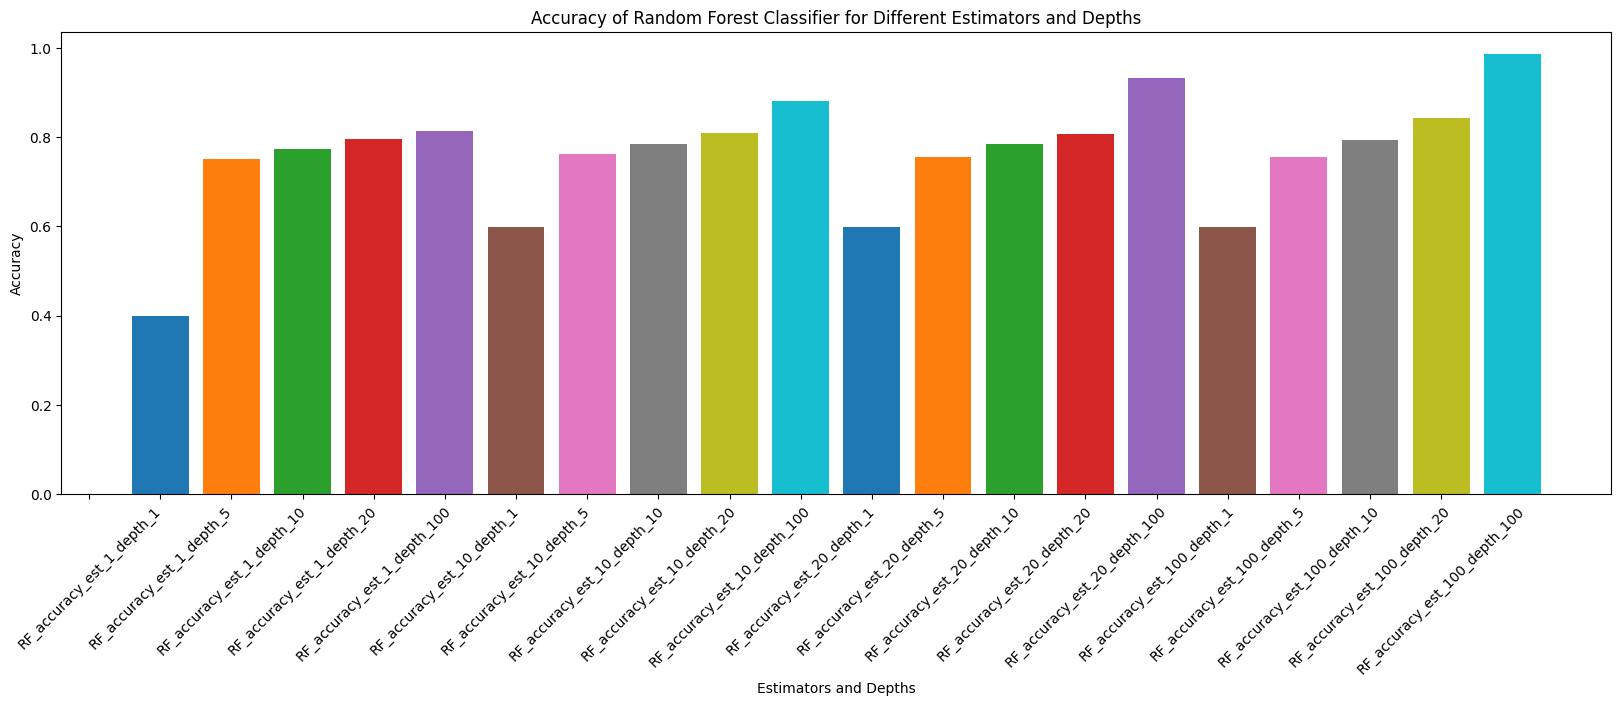

In [30]:
# Separate the keys (combinations of estimators and depths) and values (accuracy)
keys = list(accuracy.keys())
values = list(accuracy.values())

# Extract the estimators and depths from the keys
estimators = [int(key.split('_')[3]) for key in keys]
depths = [int(key.split('_')[5]) for key in keys]

# Create the bar graph
plt.figure(figsize=(20, 6))
for i in range(len(keys)):
    plt.bar(f"Estimators={estimators[i]}, Depth={depths[i]}", values[i])
plt.xlabel('Estimators and Depths')
plt.ylabel('Accuracy')
plt.title('Accuracy of Random Forest Classifier for Different Estimators and Depths')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.xticks([i-1 for i in range(len(keys))], keys)  # Shift the x-axis labels one tick to the left
#plt.ylim(0.7, 0.8)
plt.show()

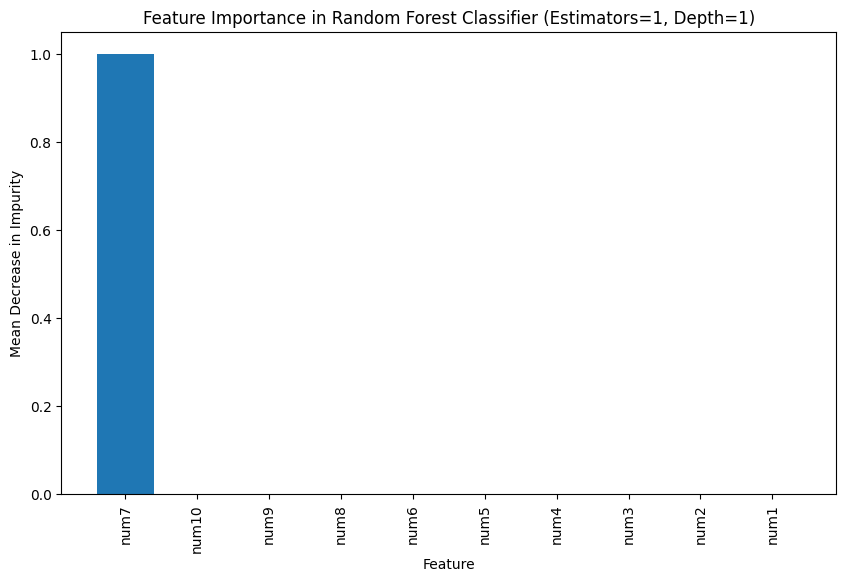

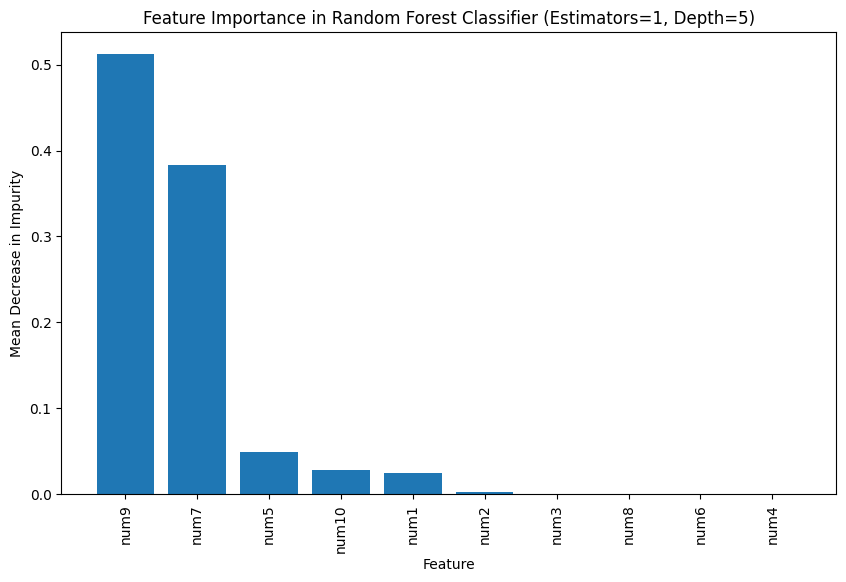

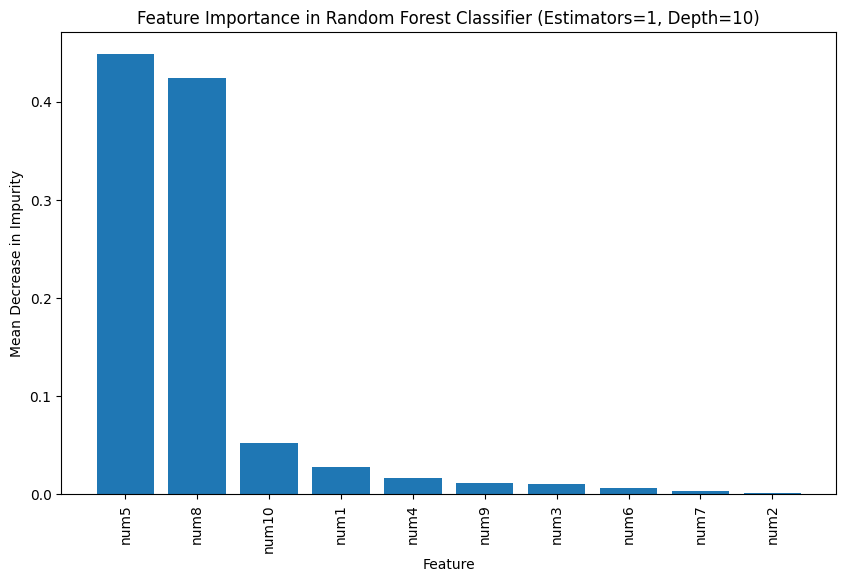

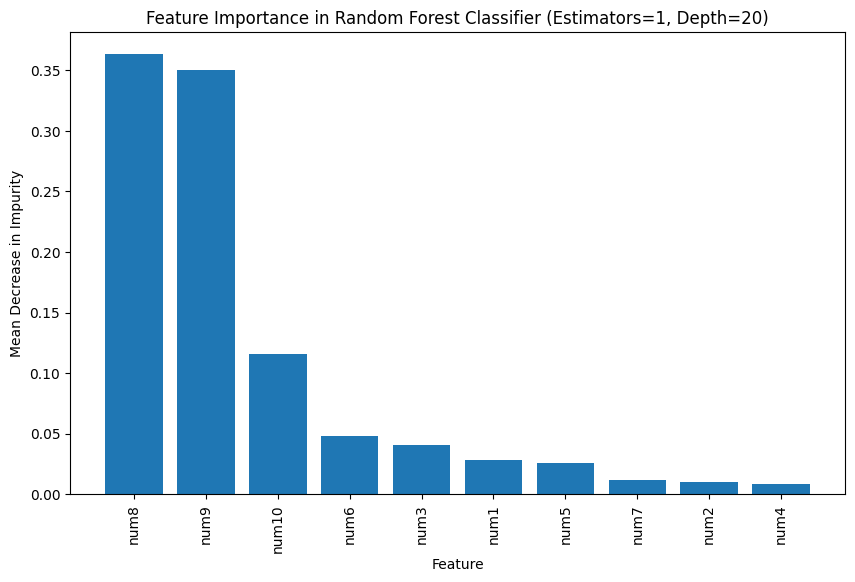

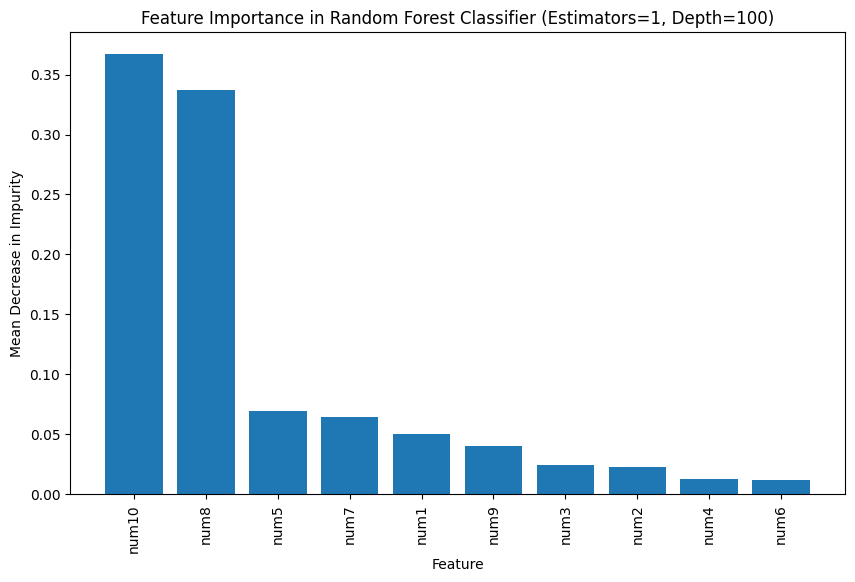

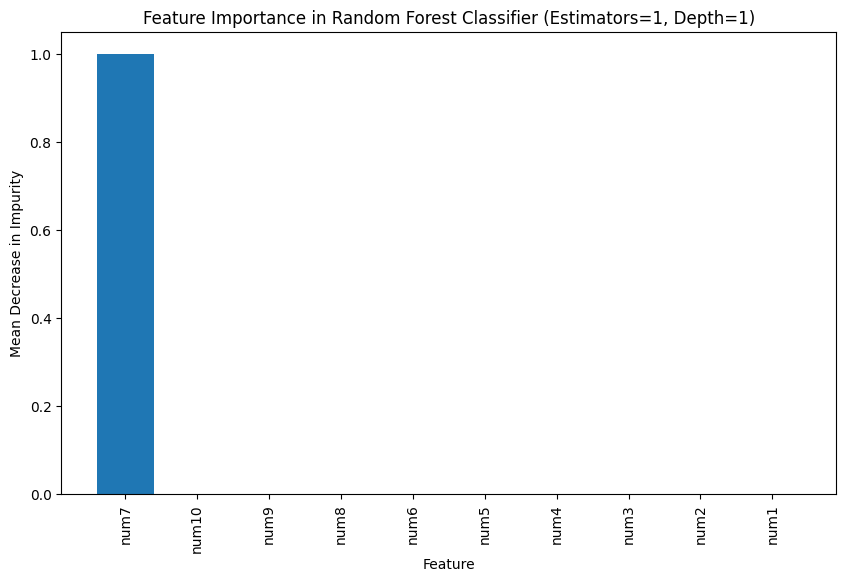

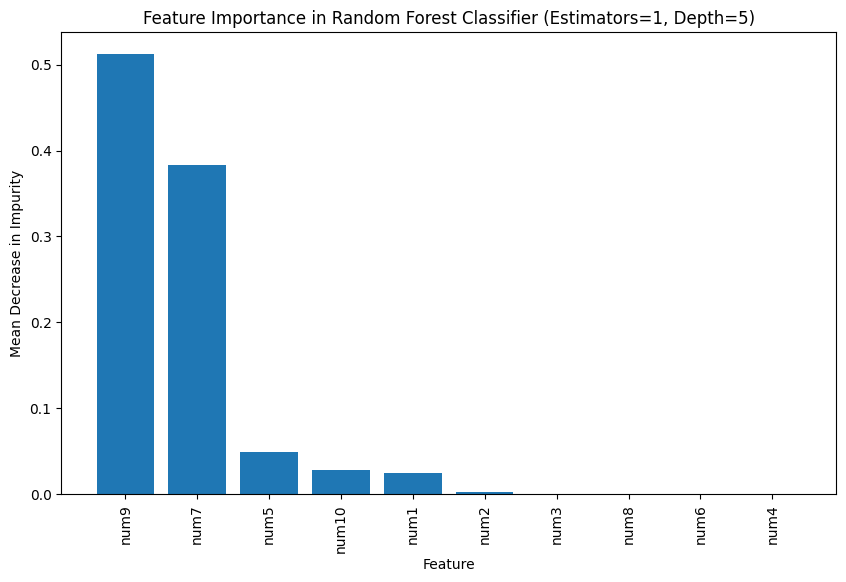

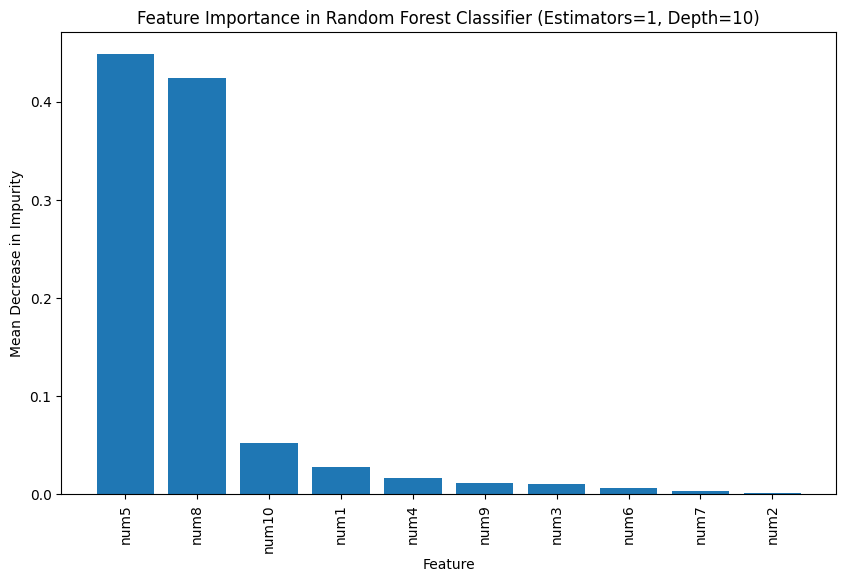

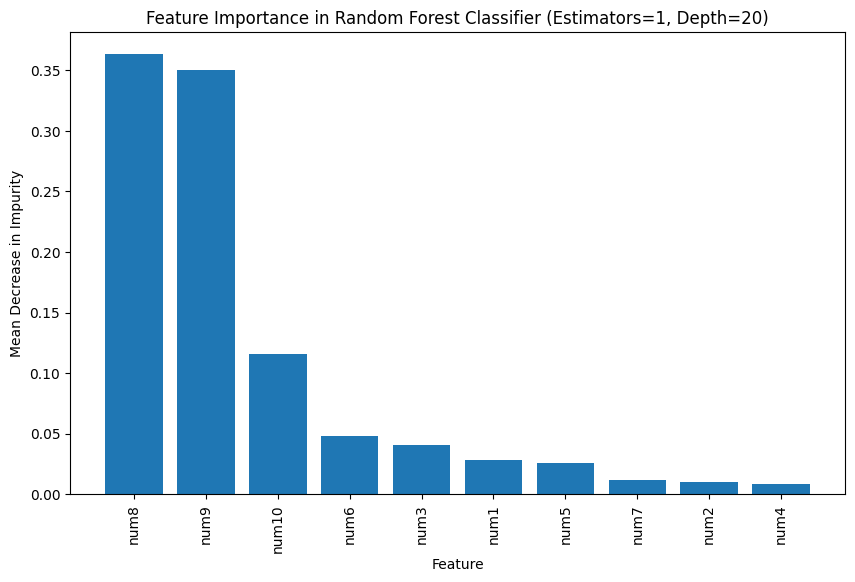

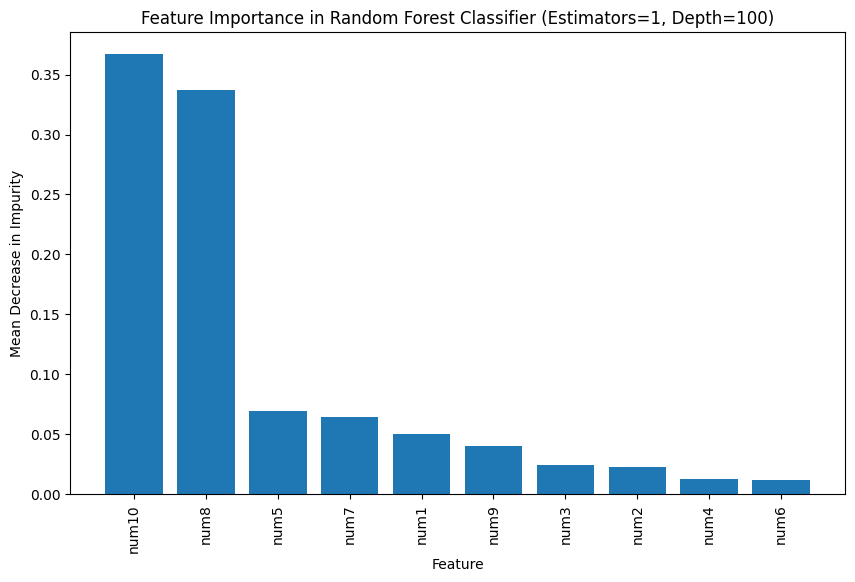

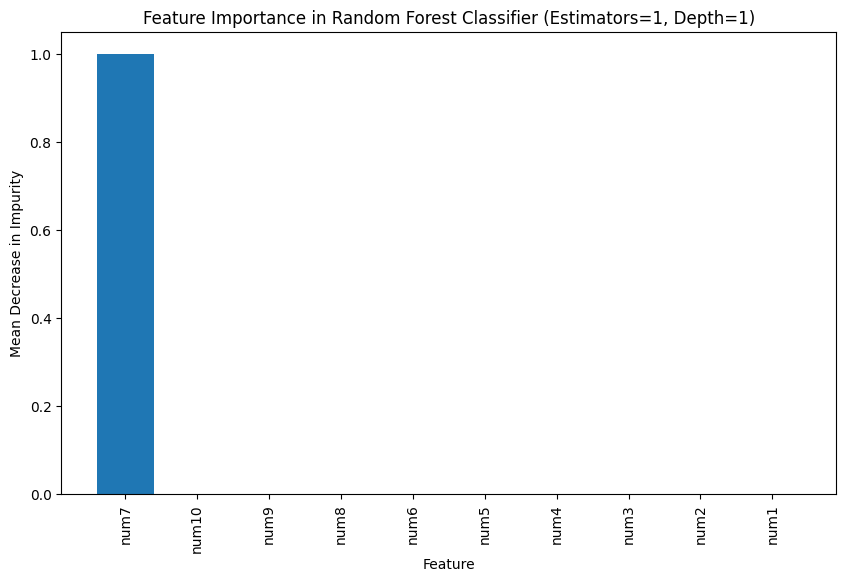

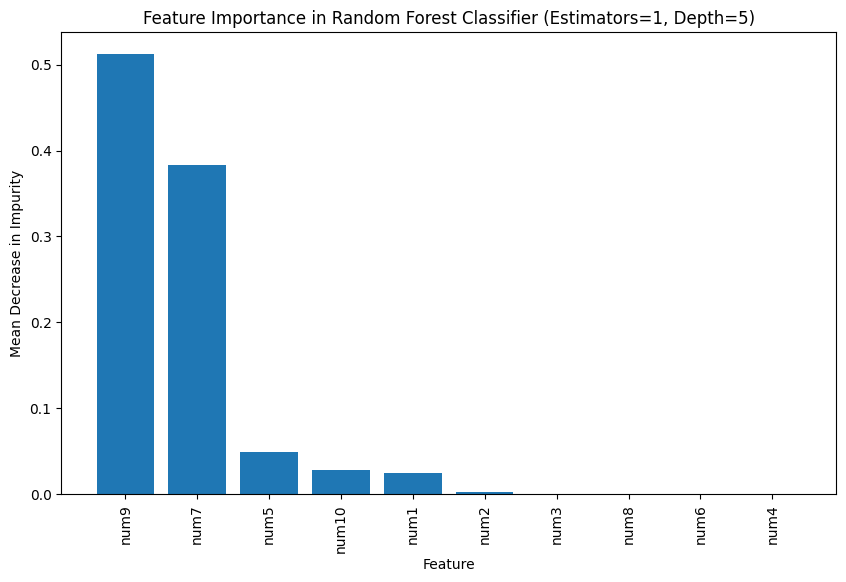

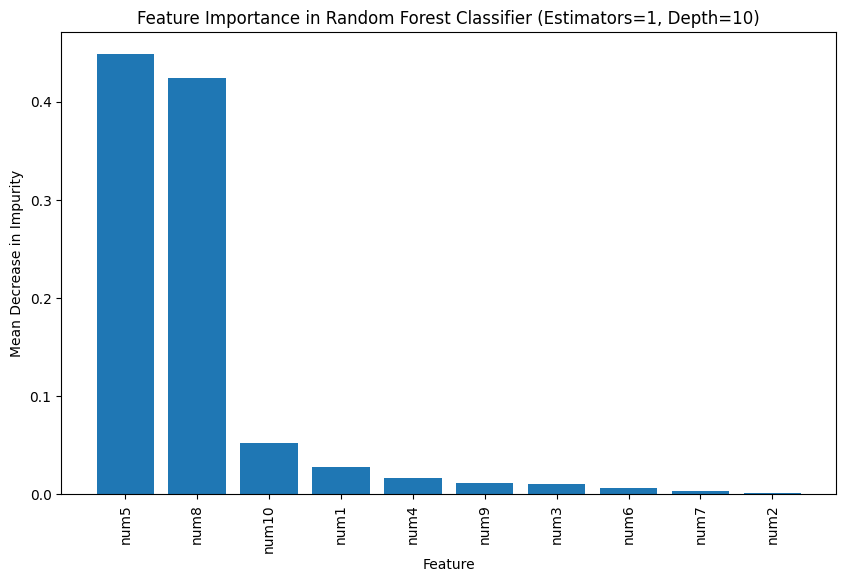

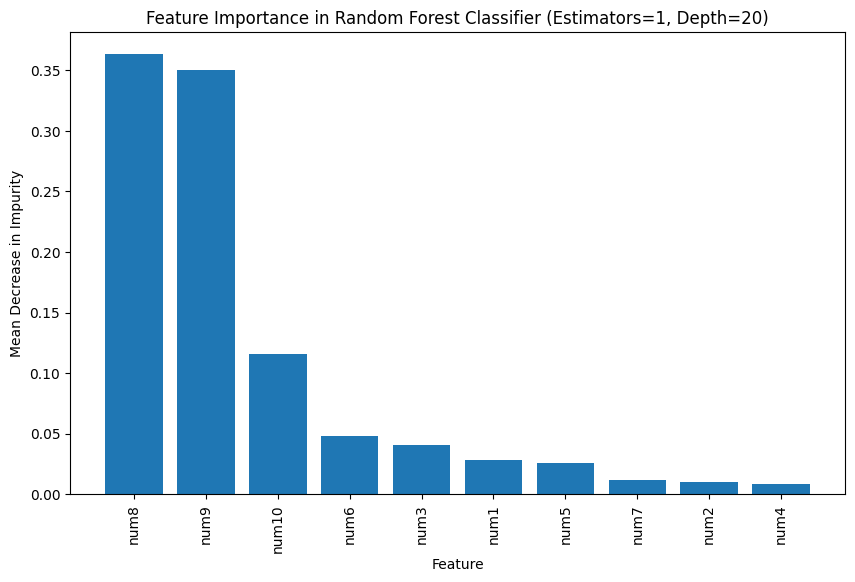

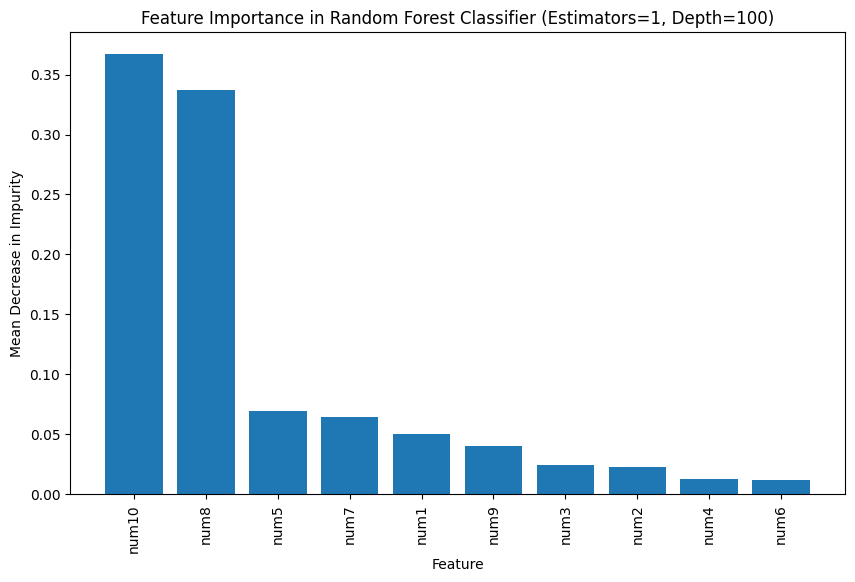

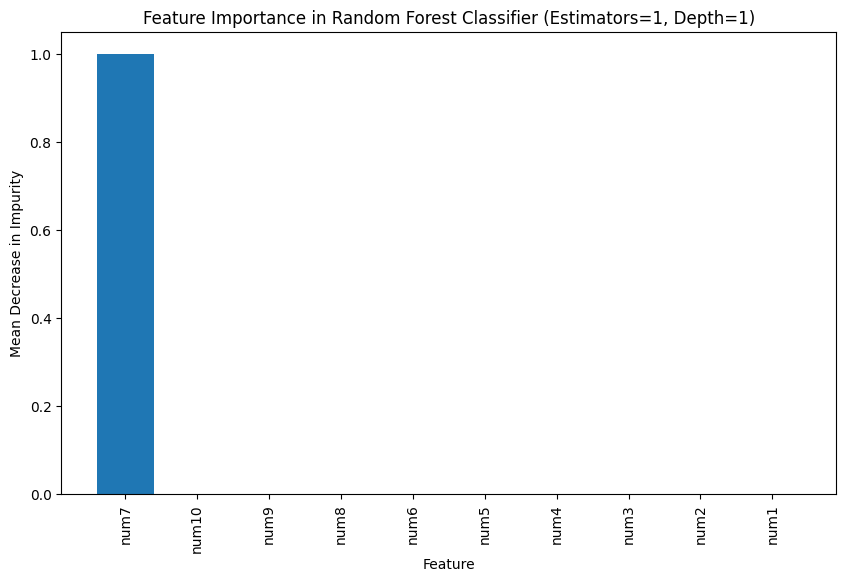

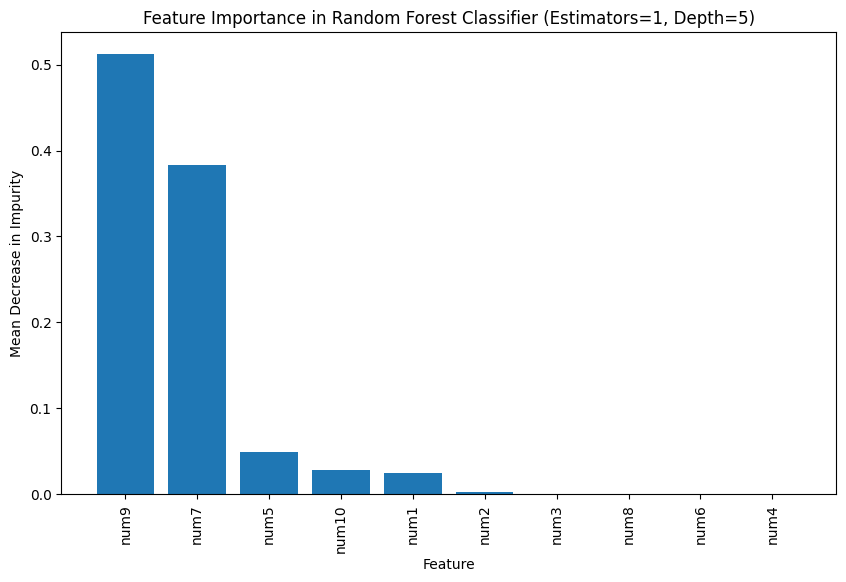

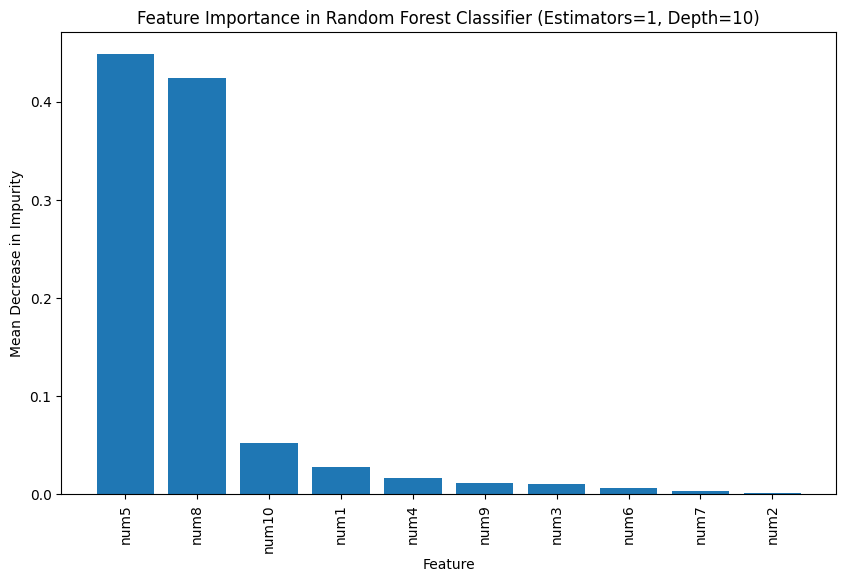

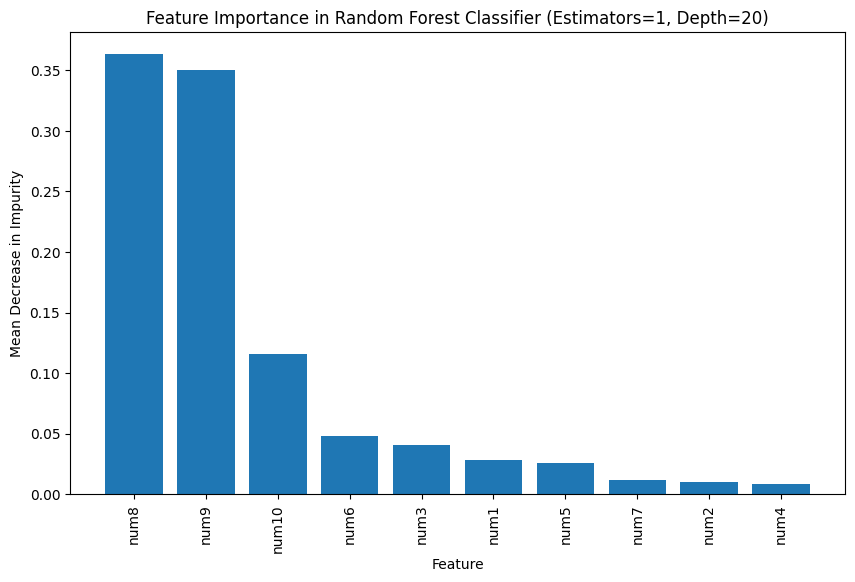

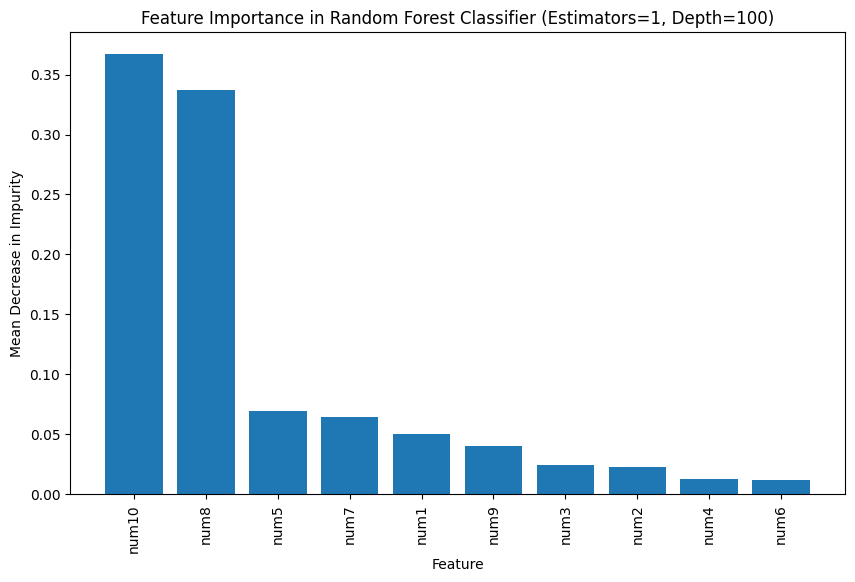

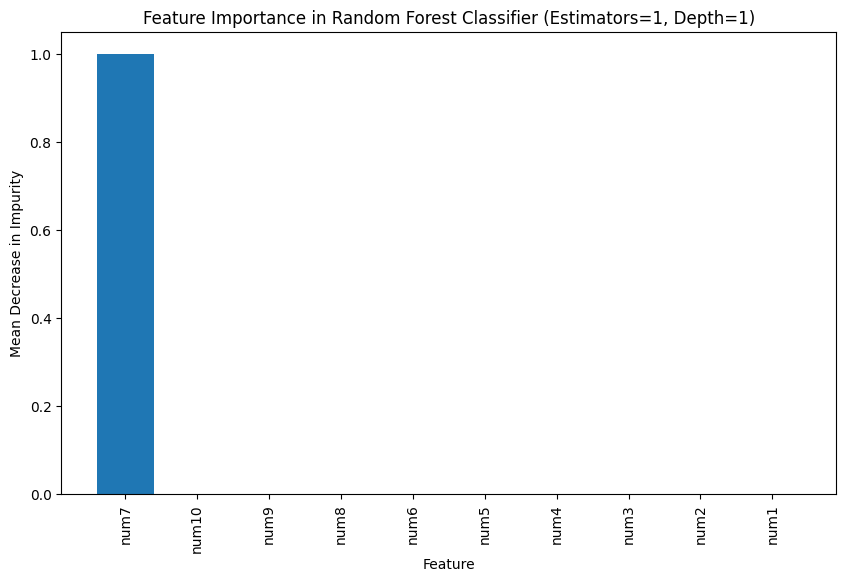

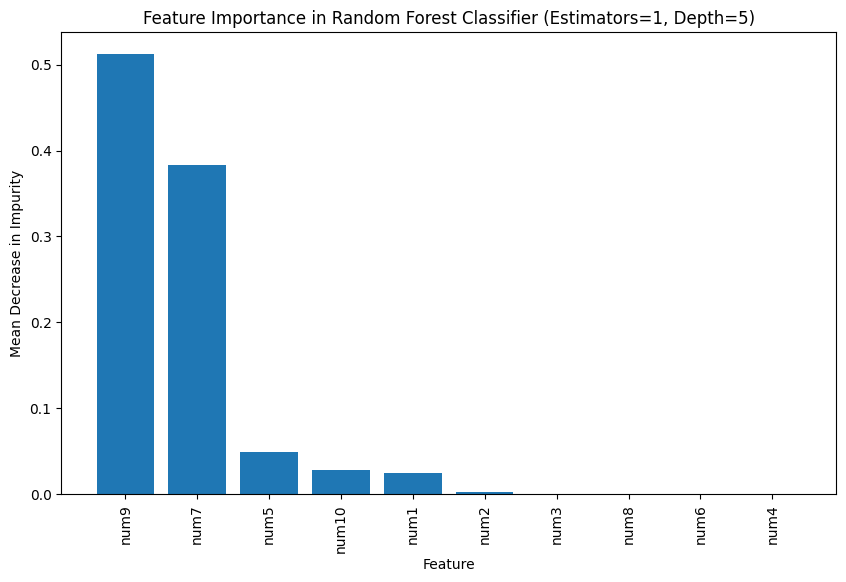

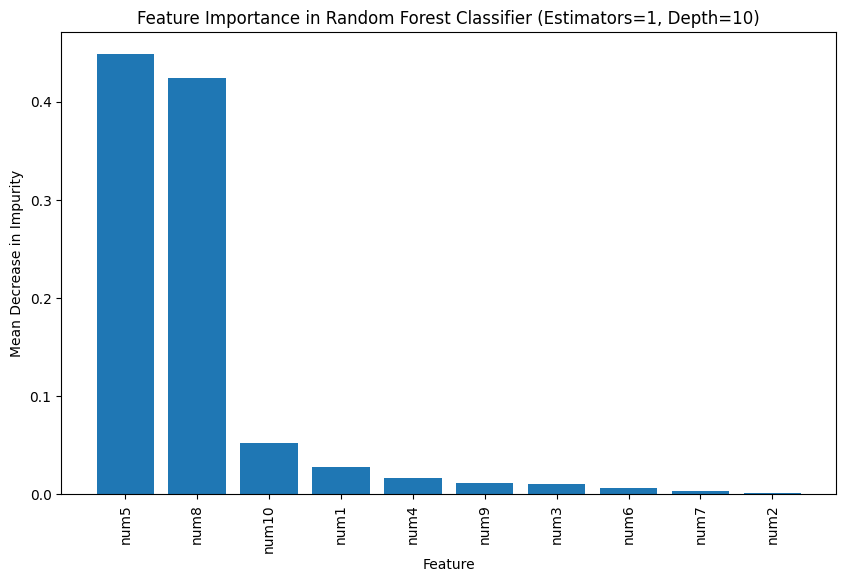

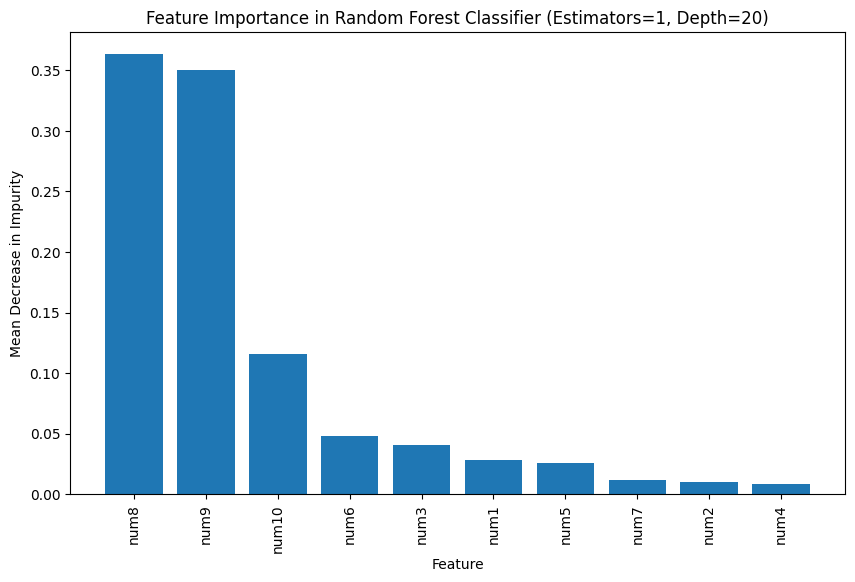

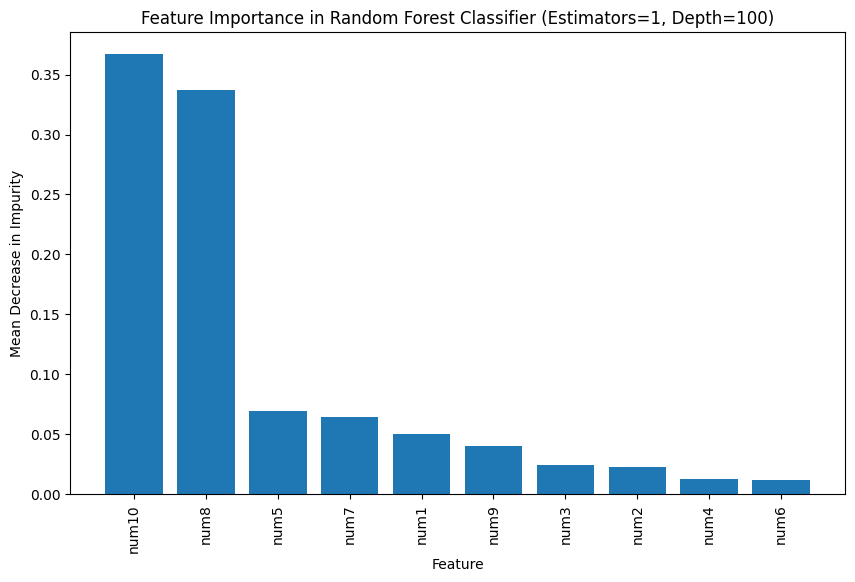

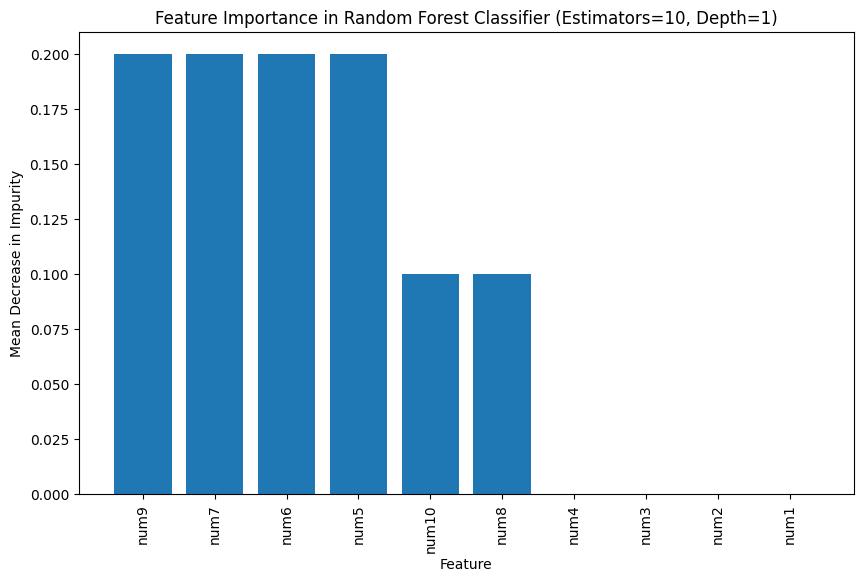

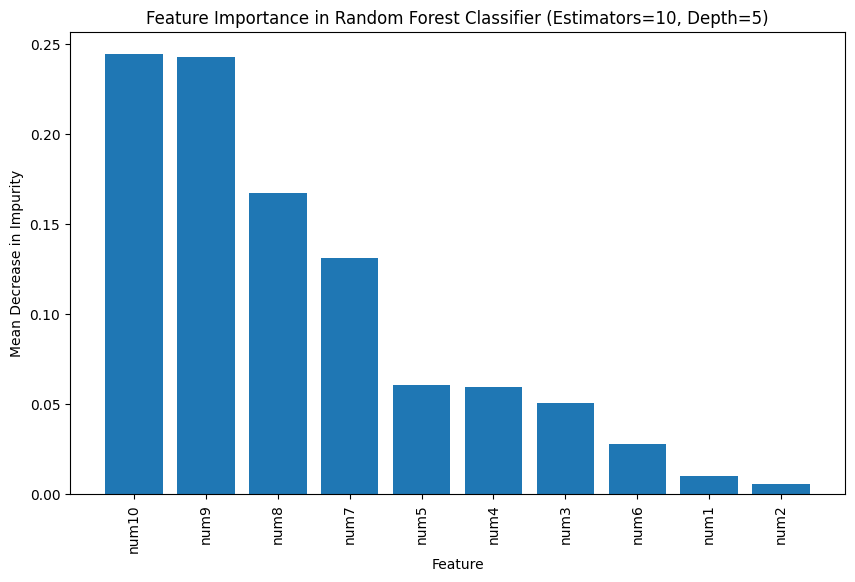

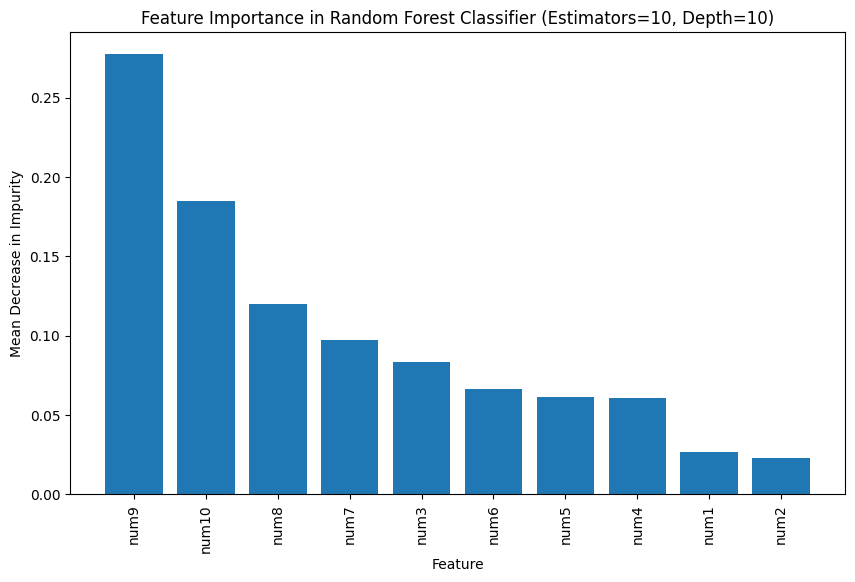

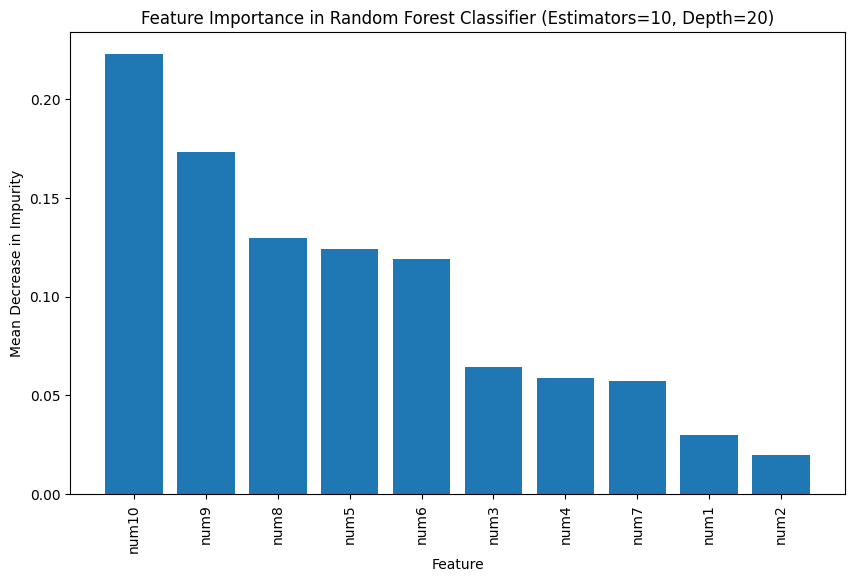

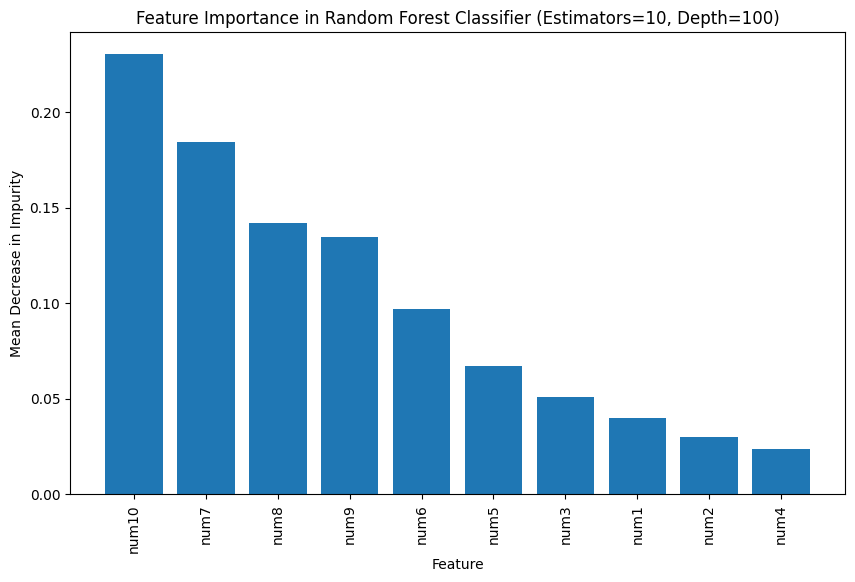

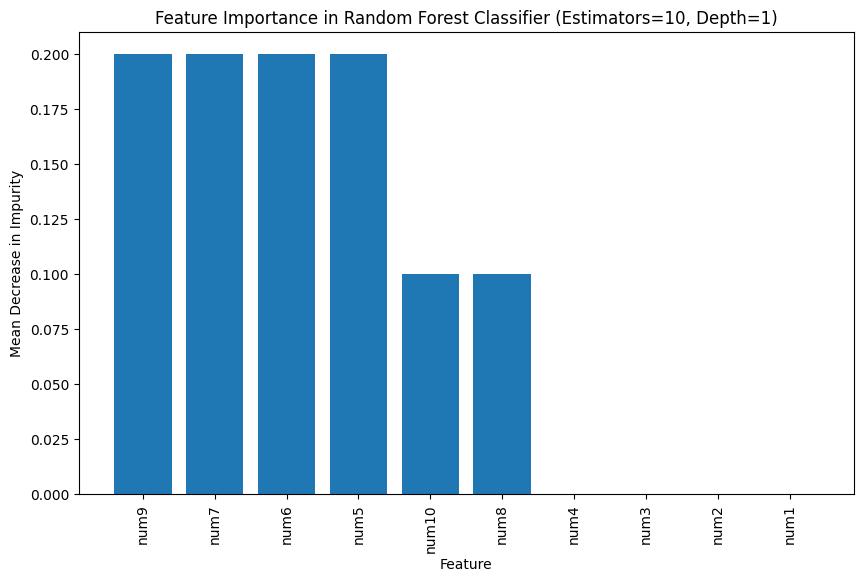

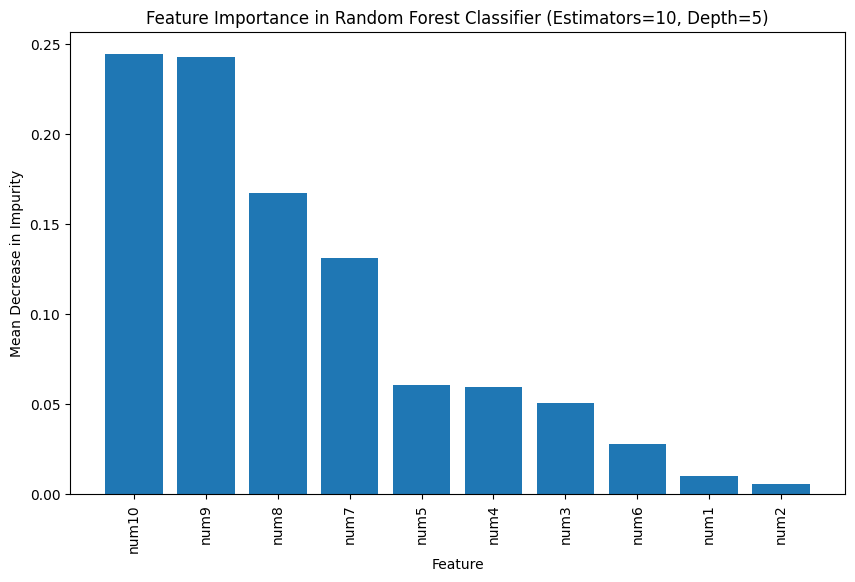

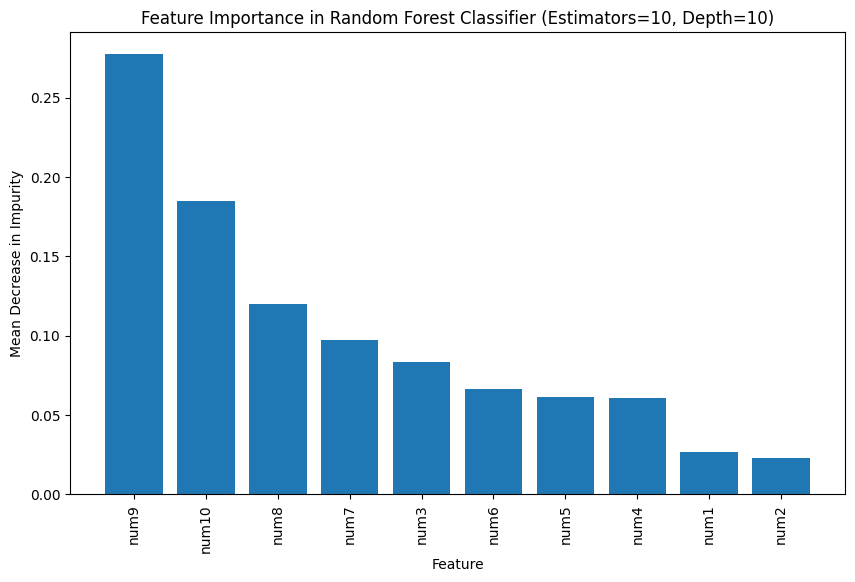

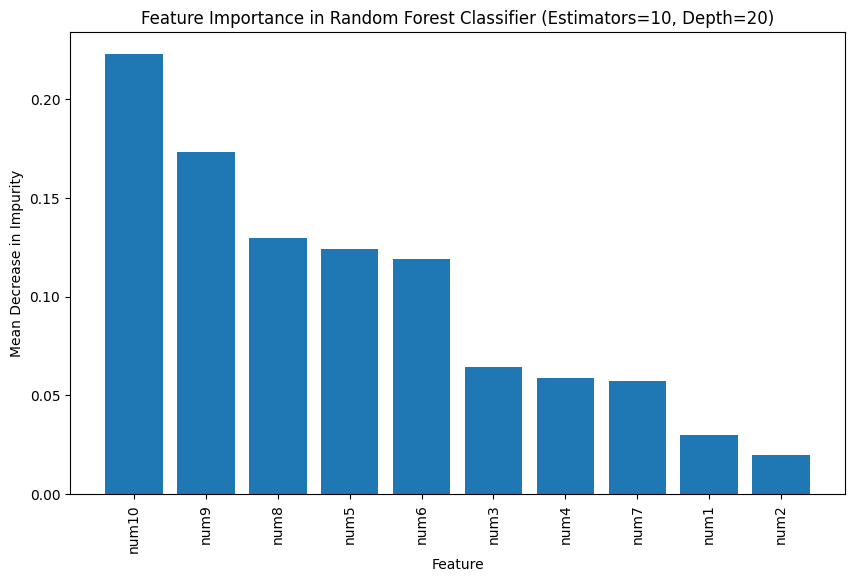

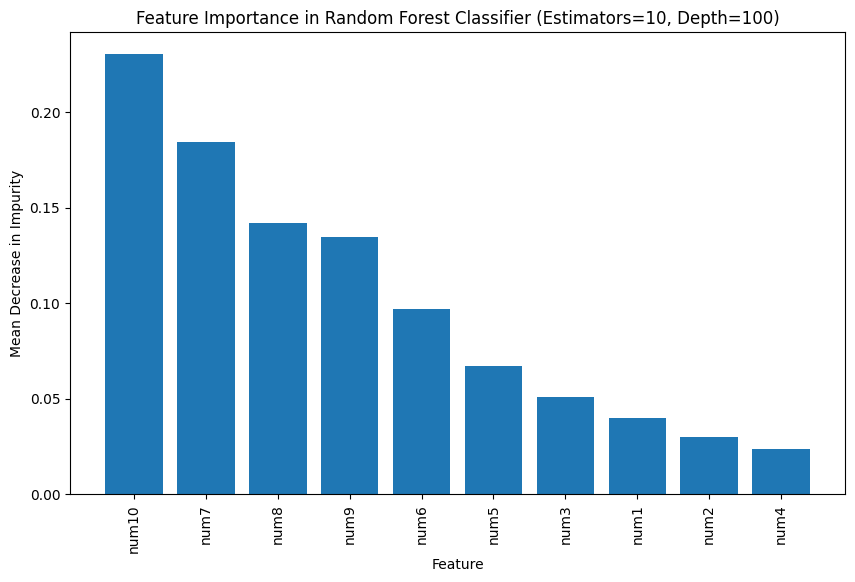

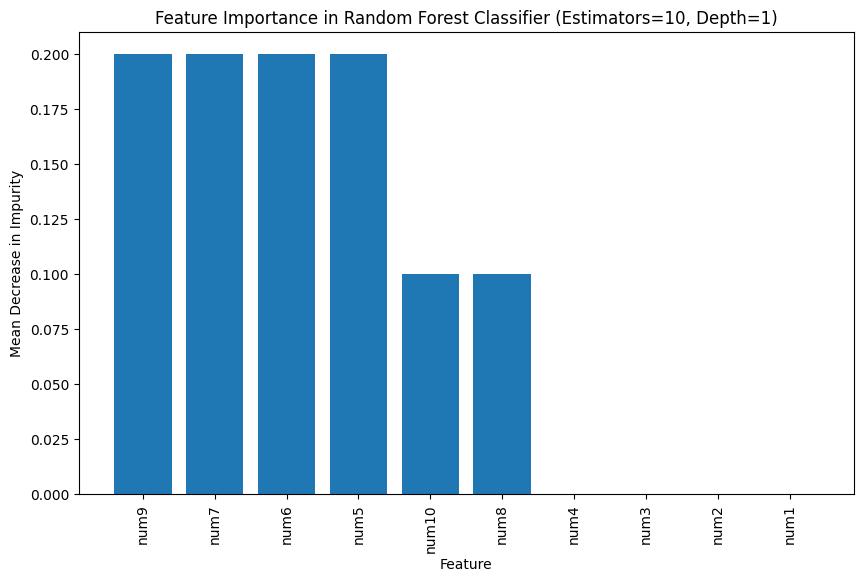

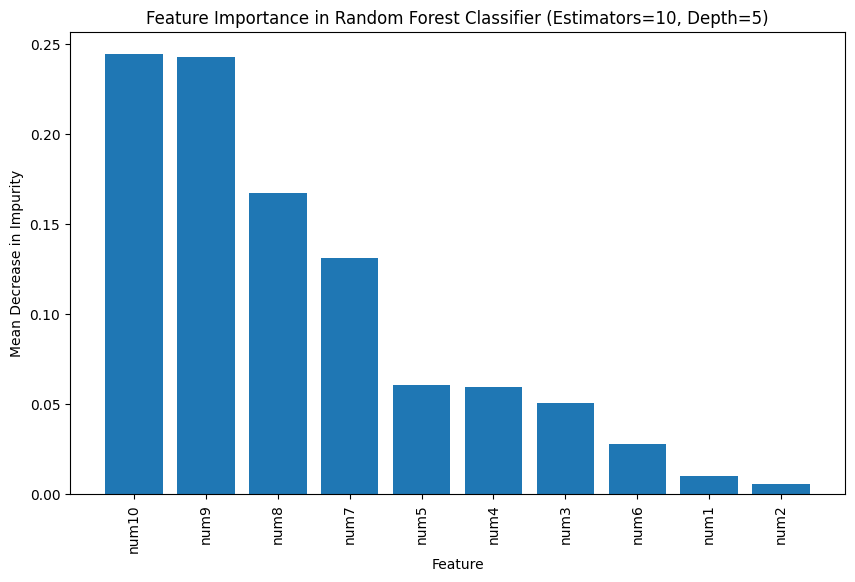

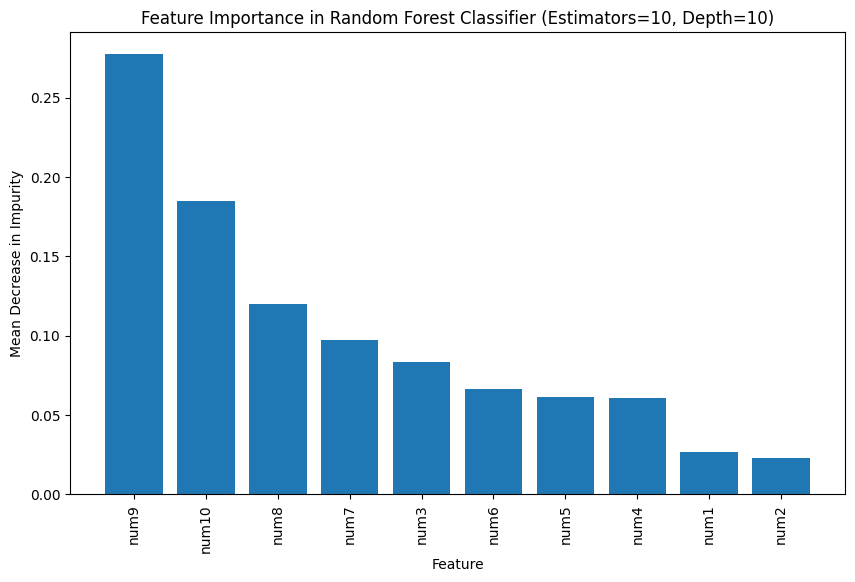

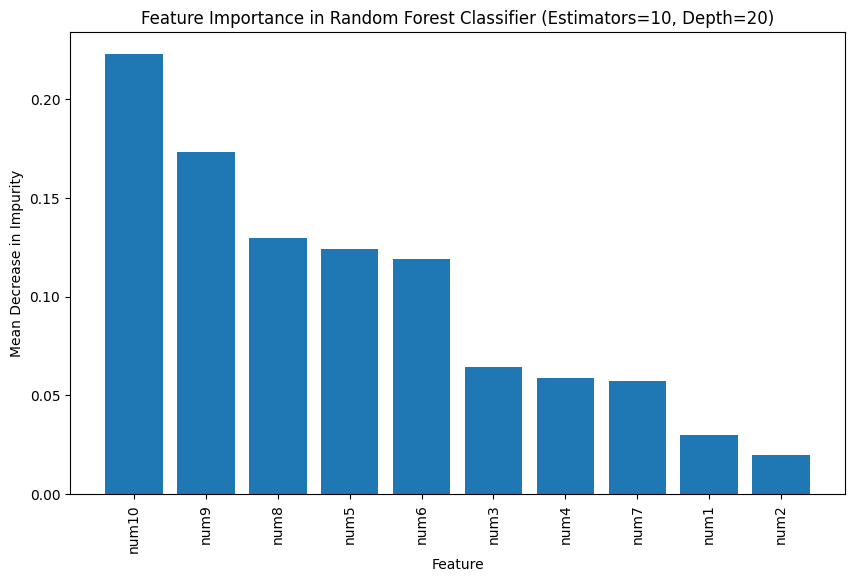

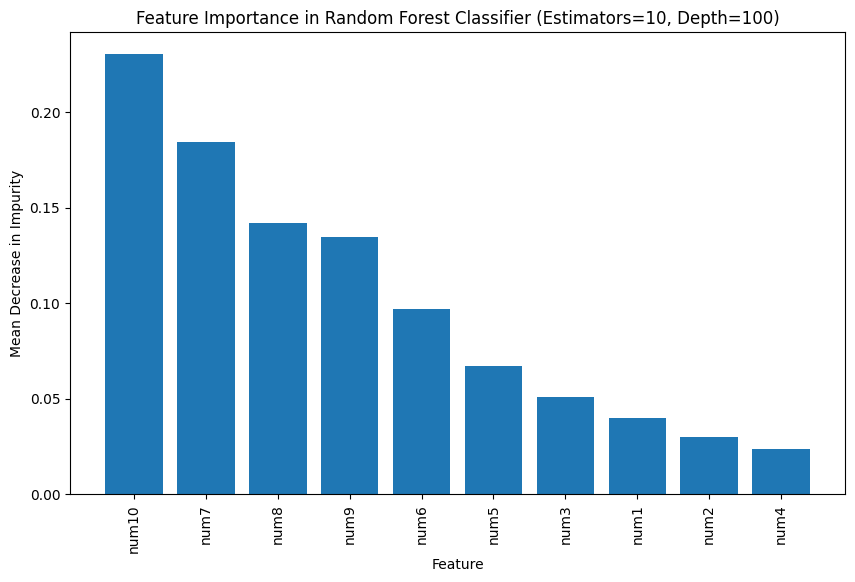

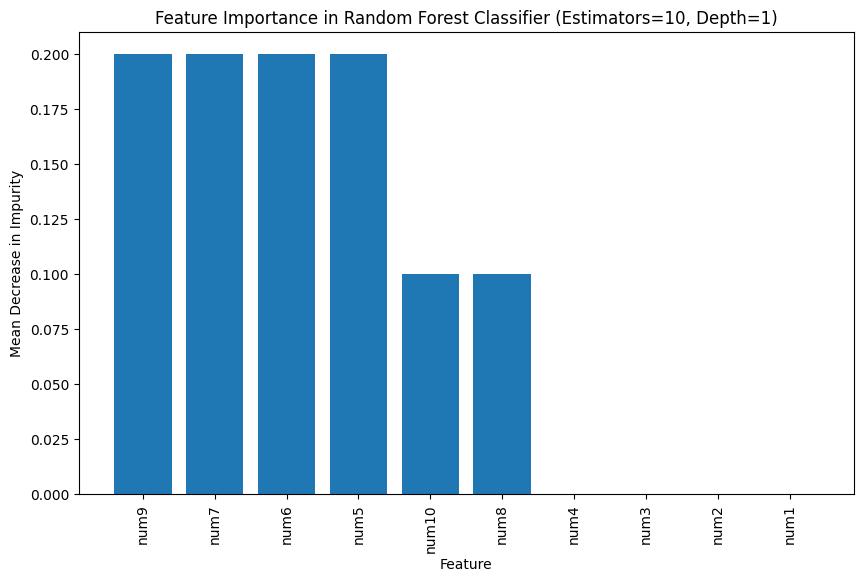

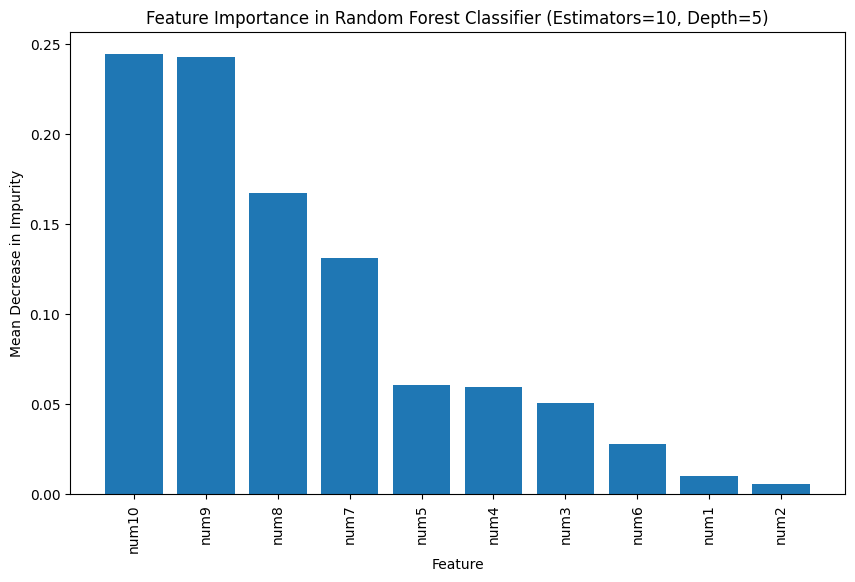

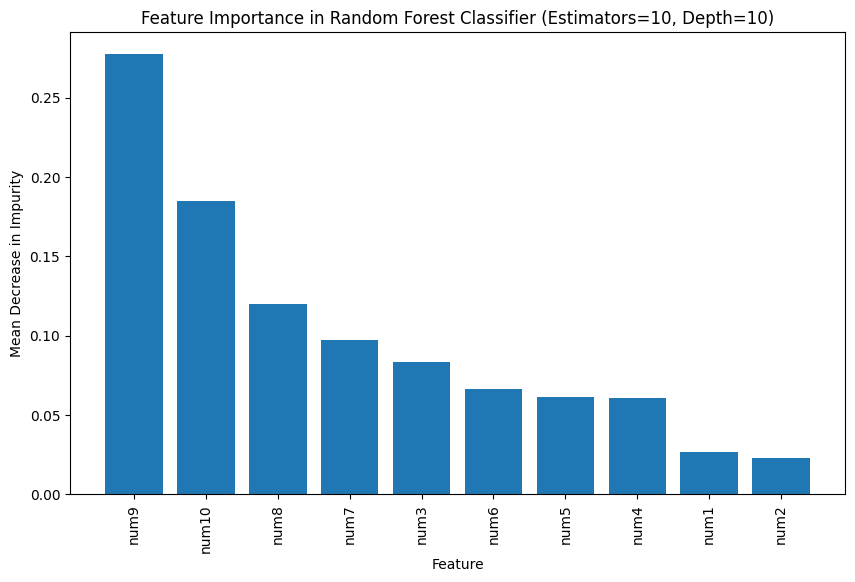

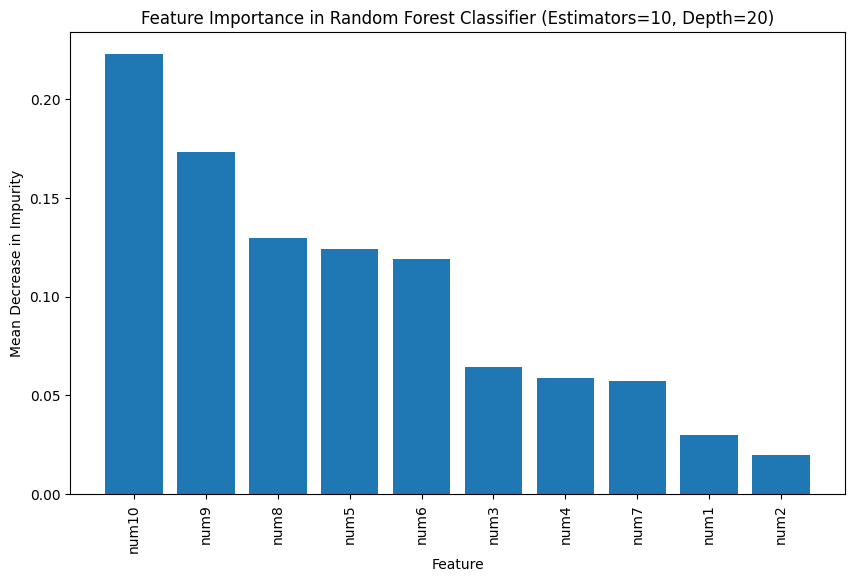

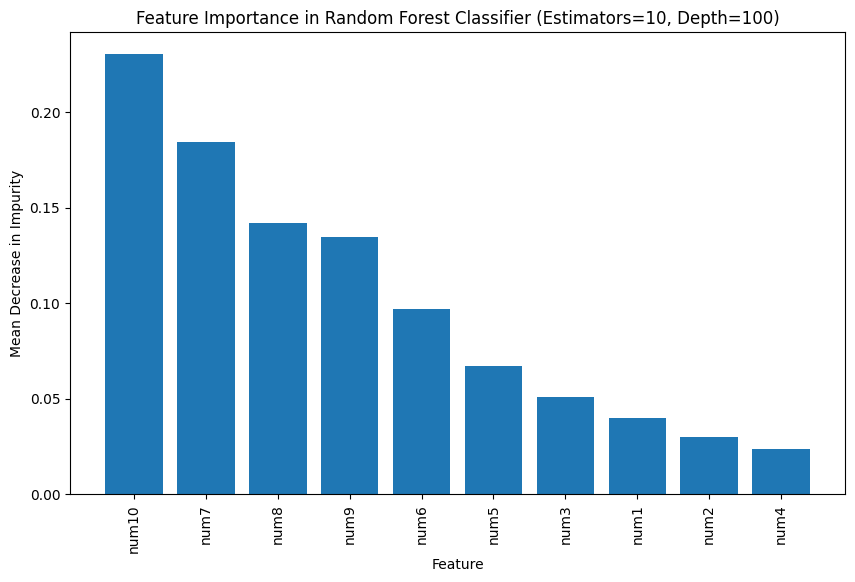

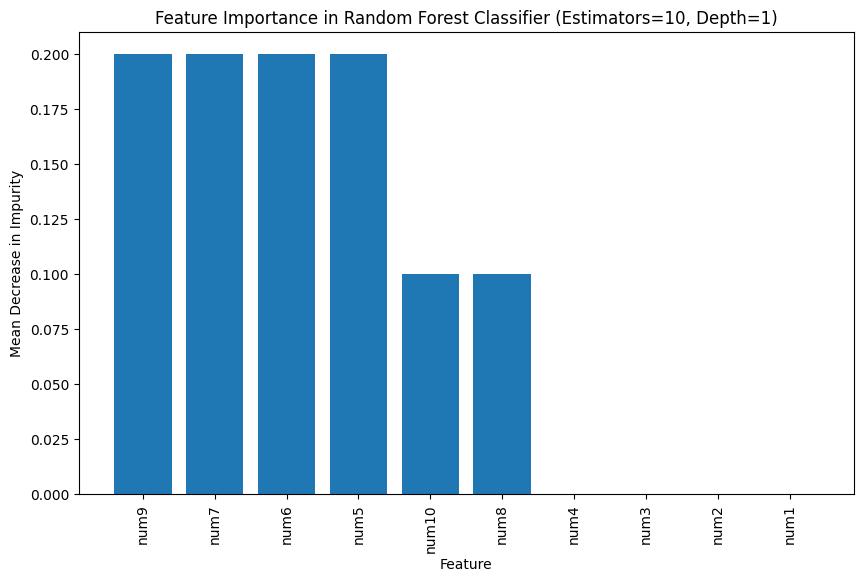

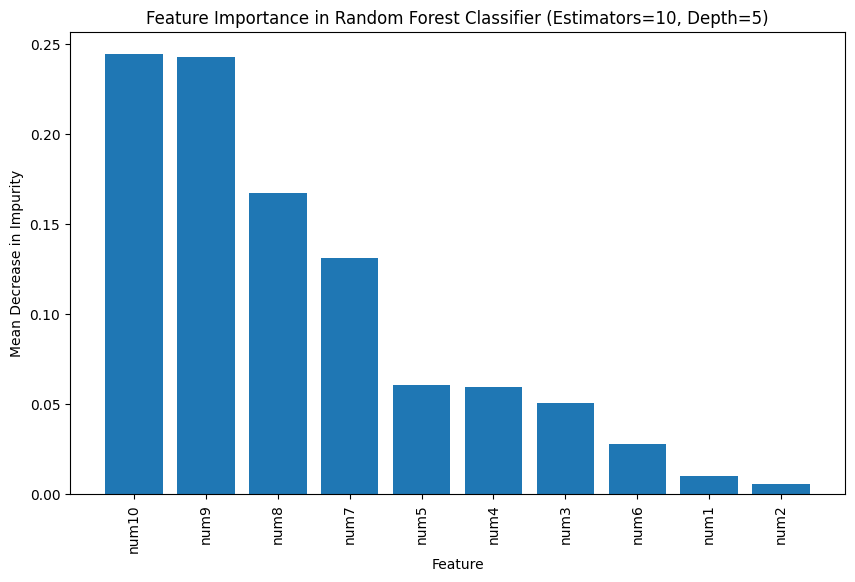

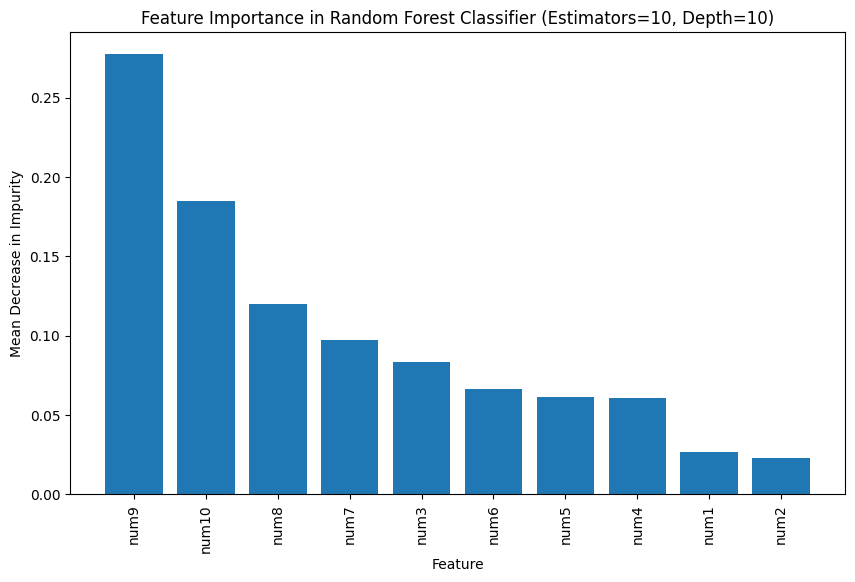

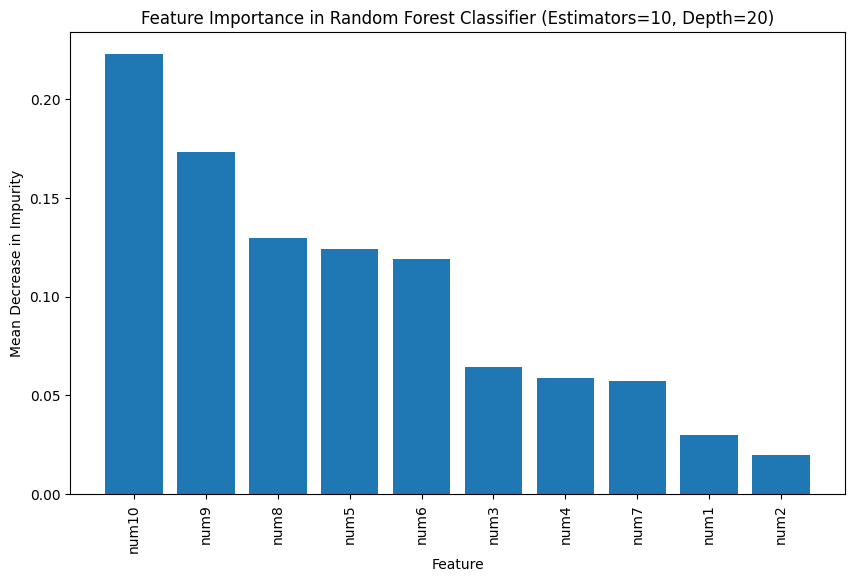

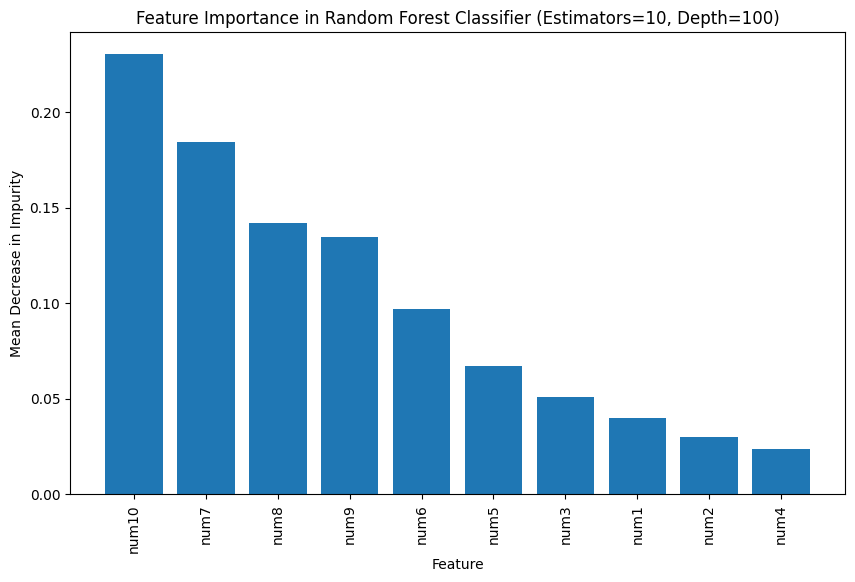

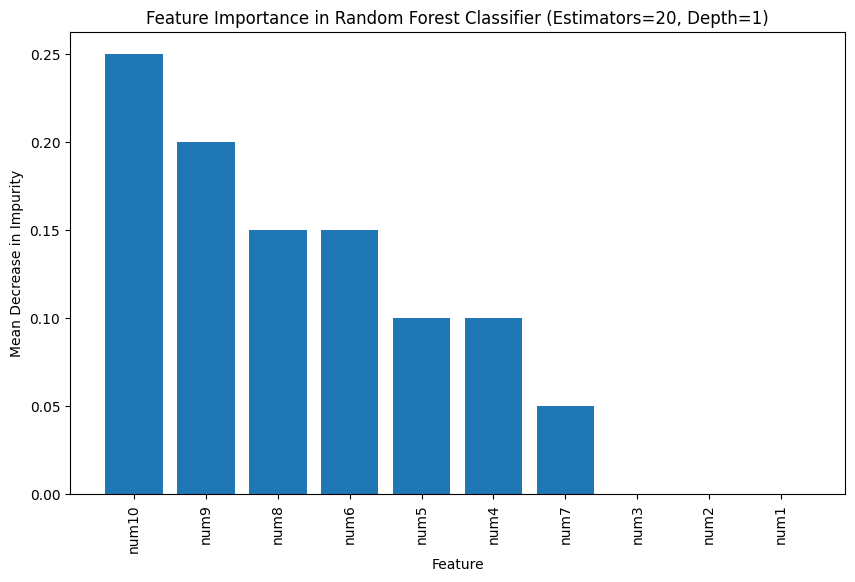

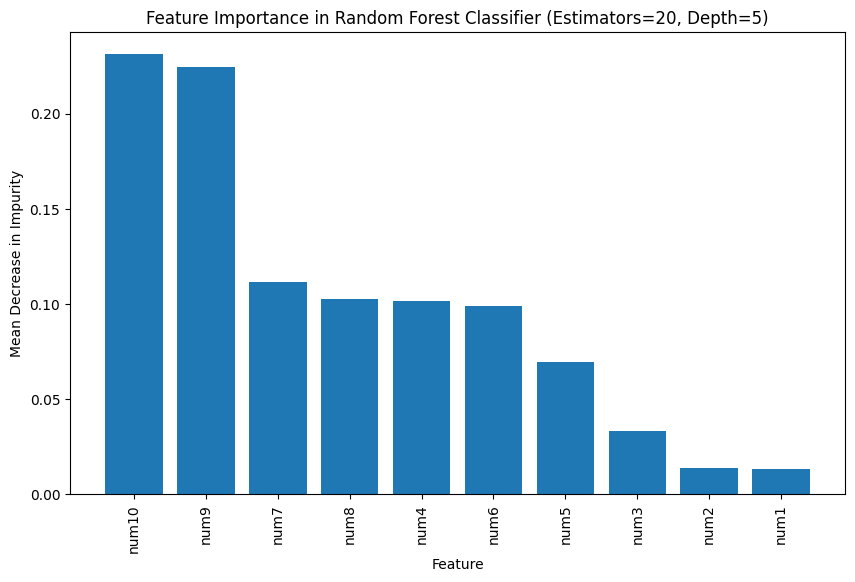

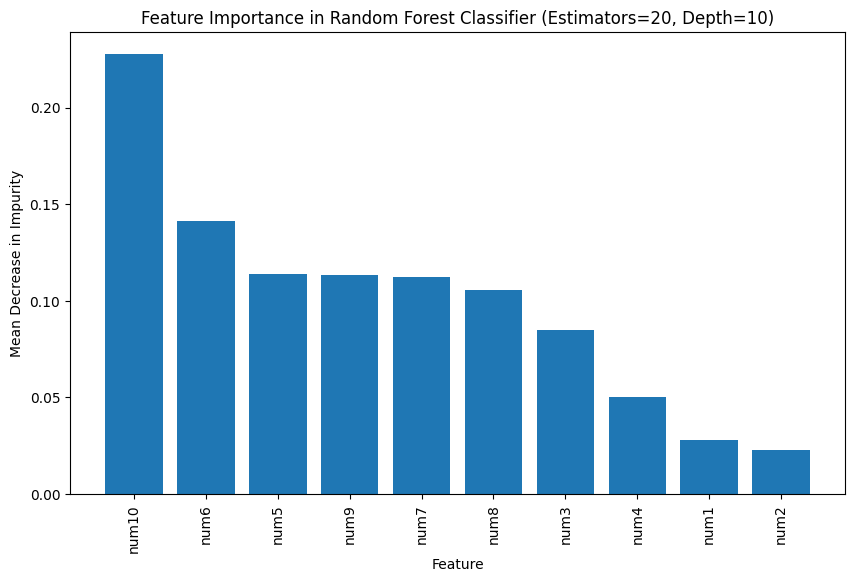

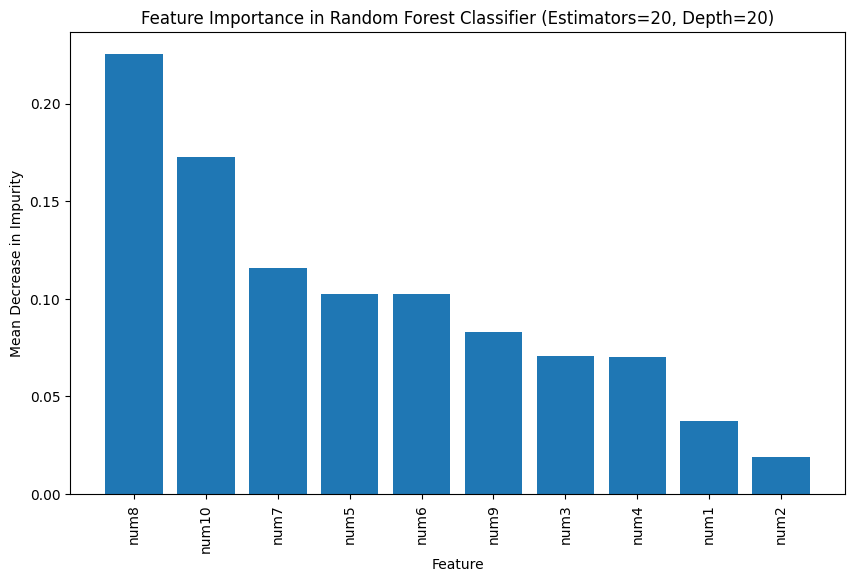

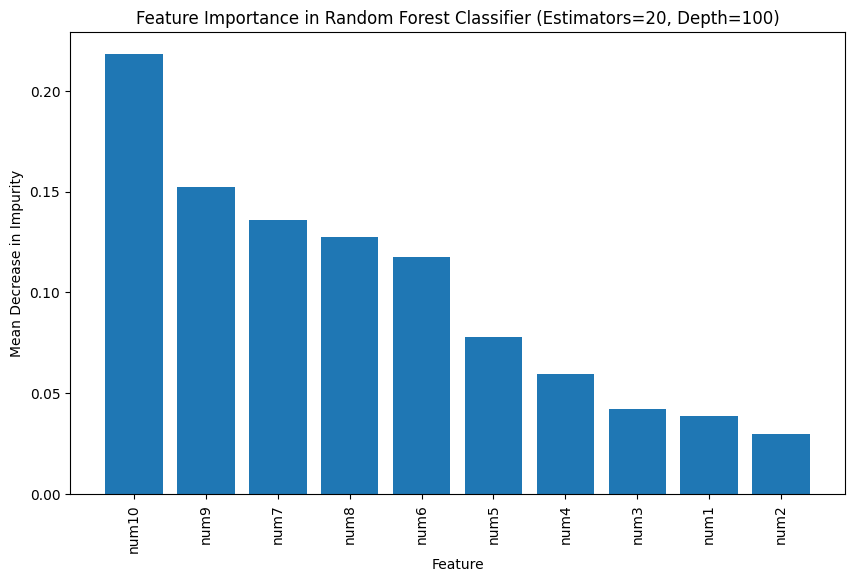

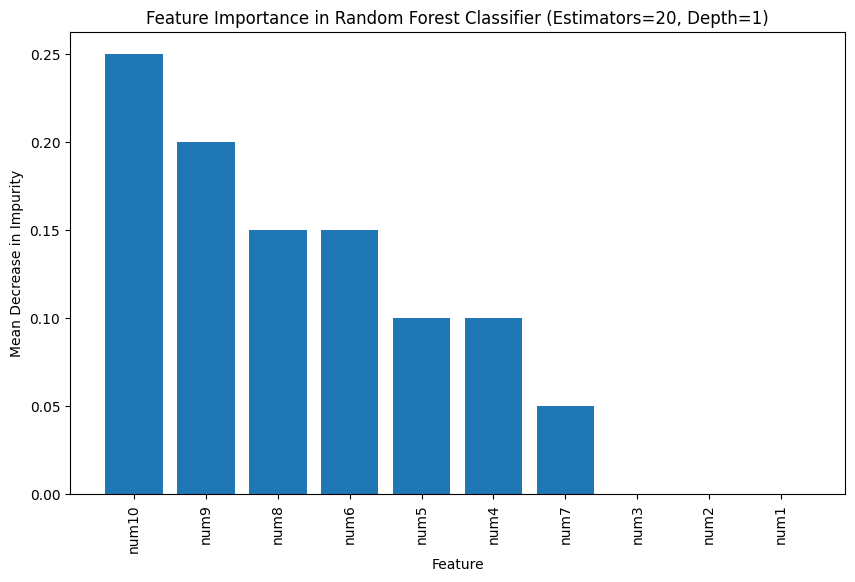

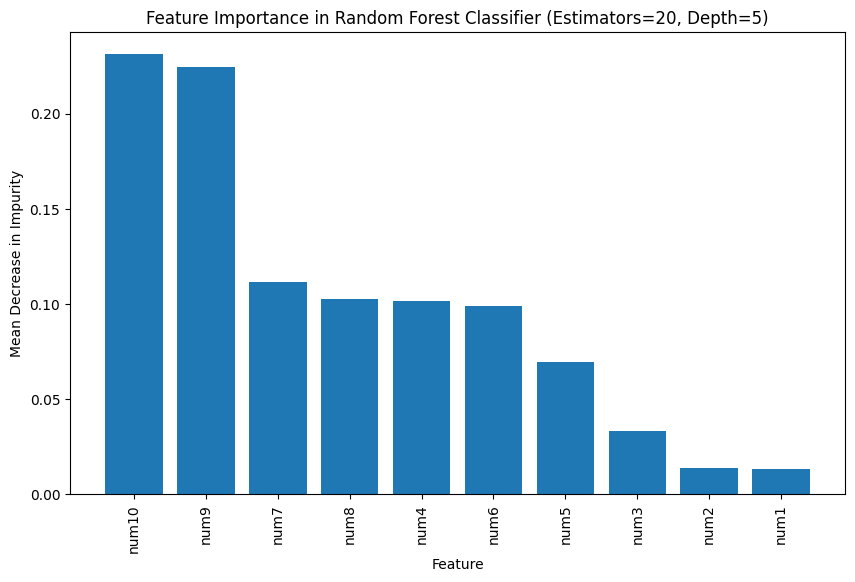

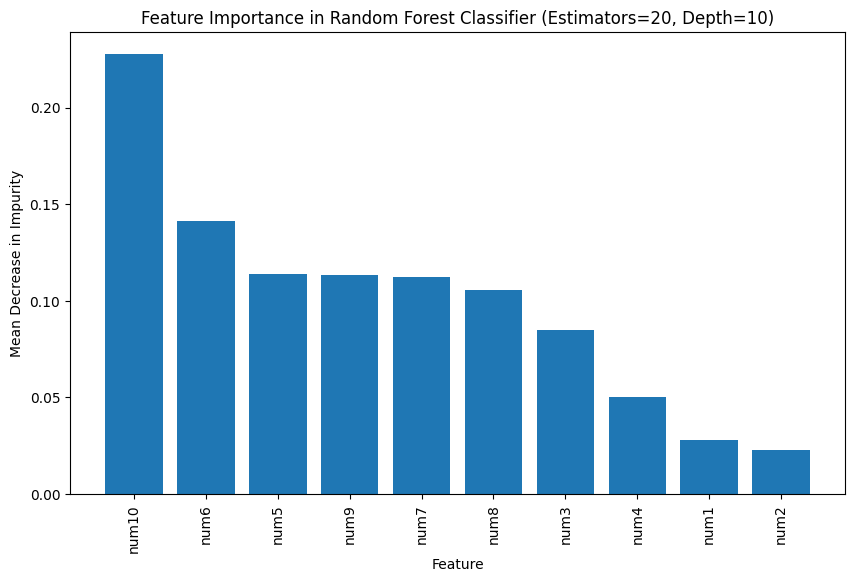

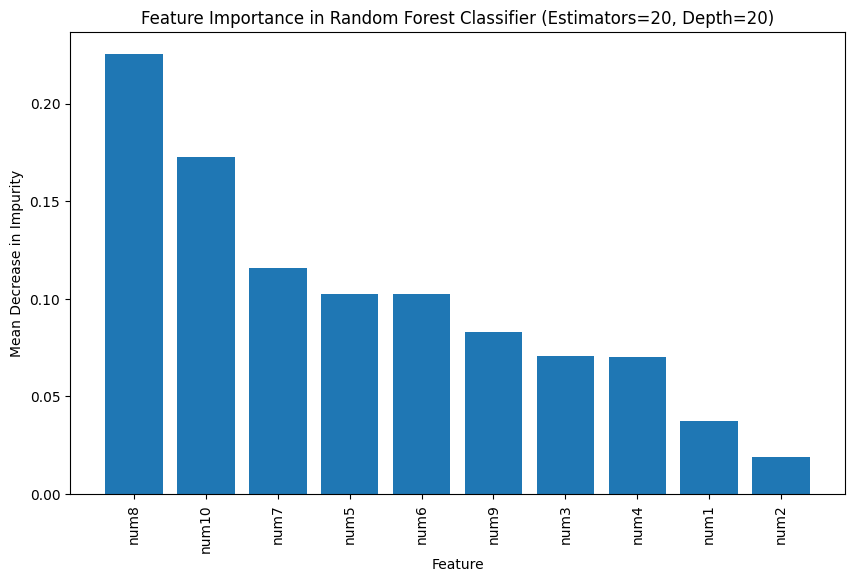

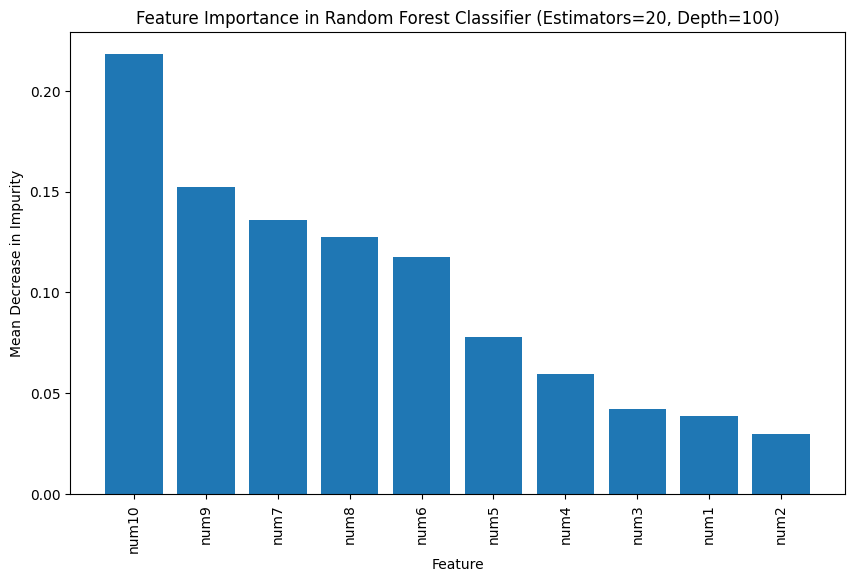

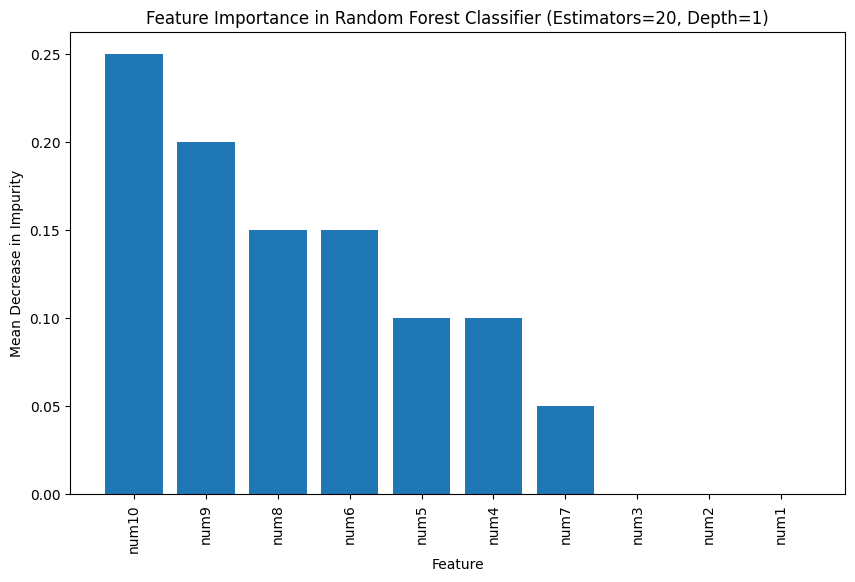

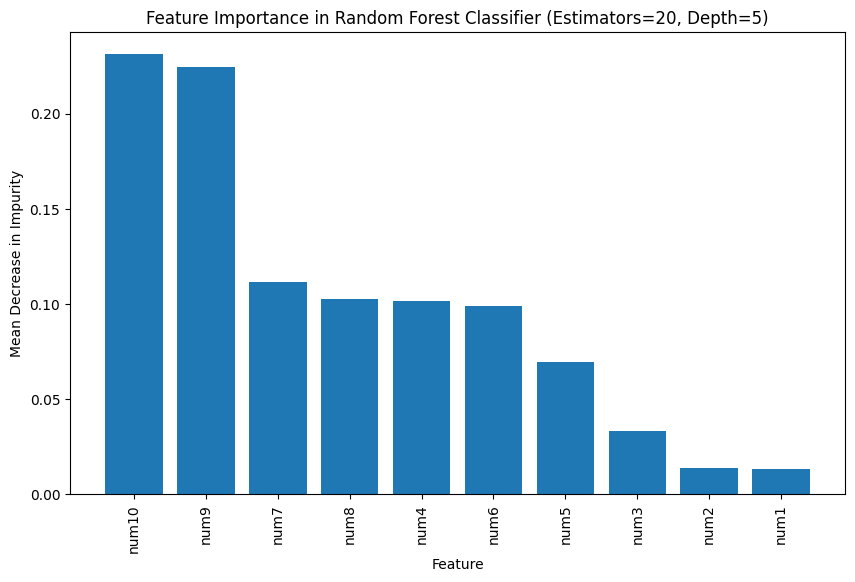

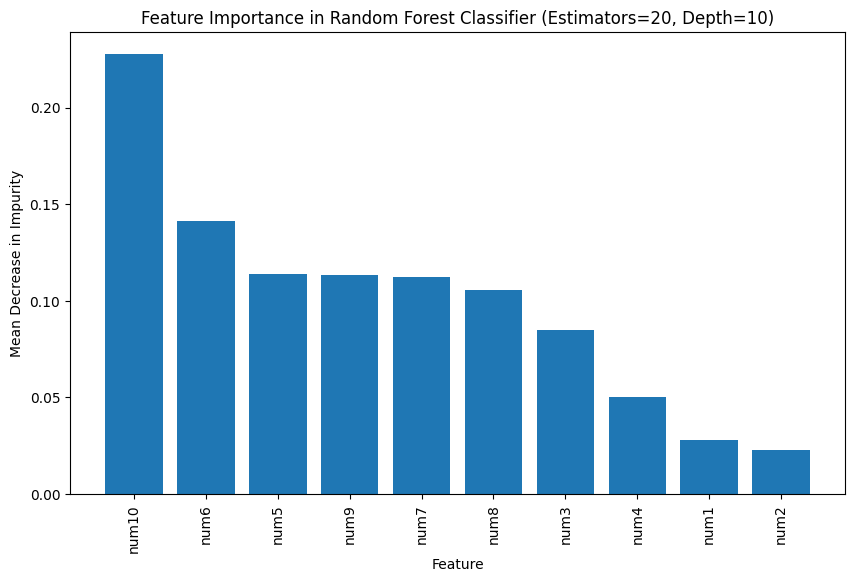

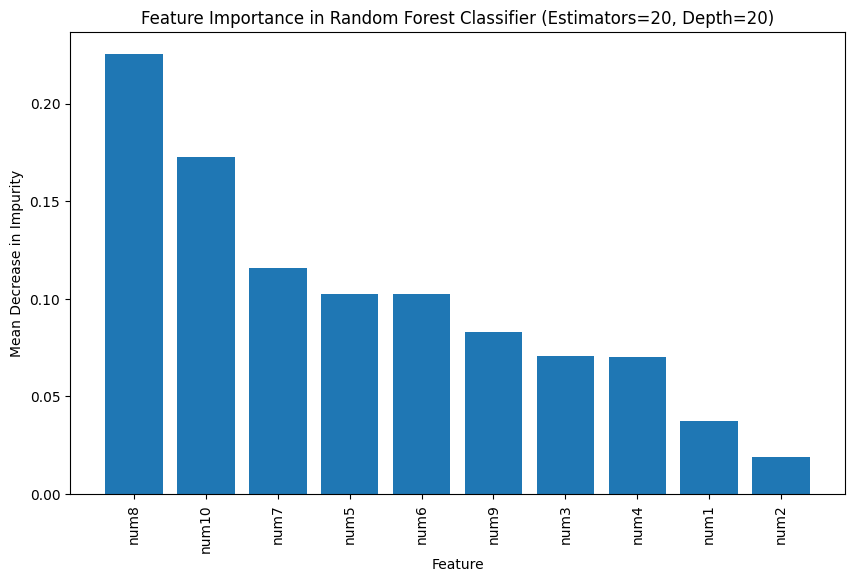

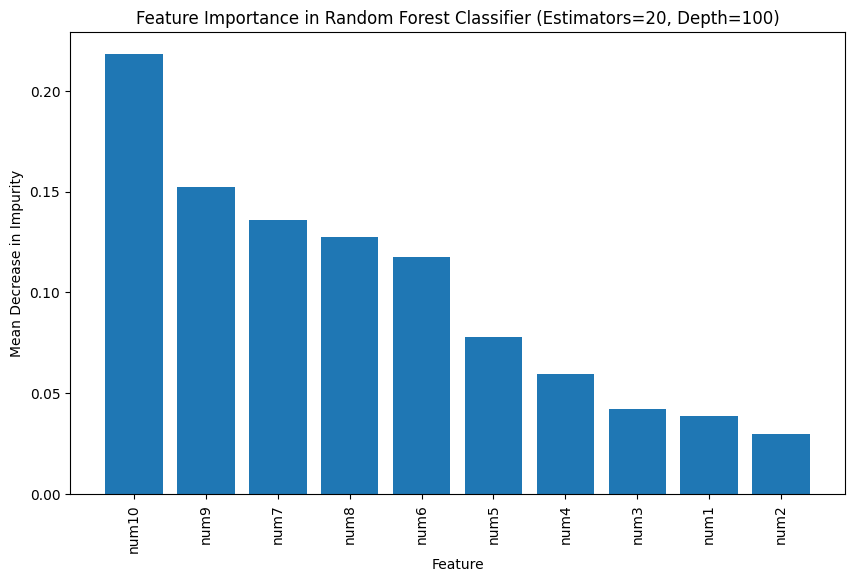

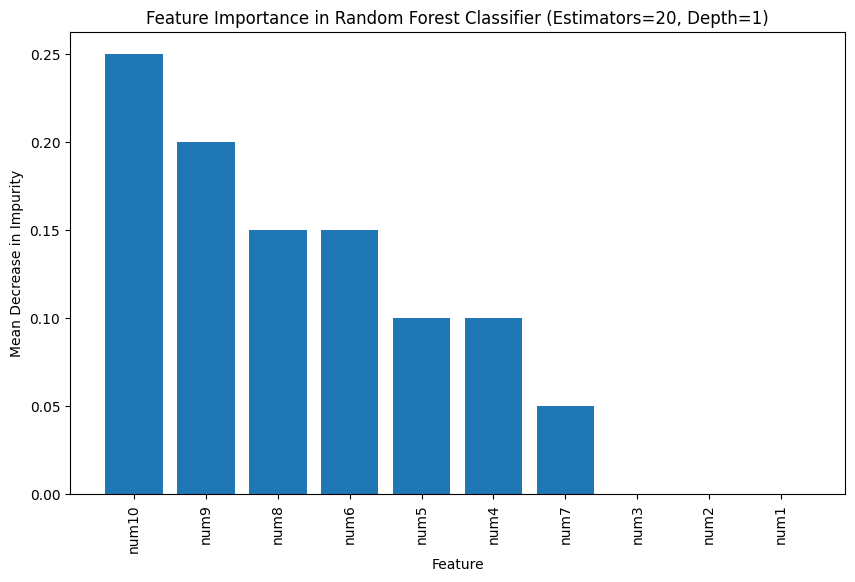

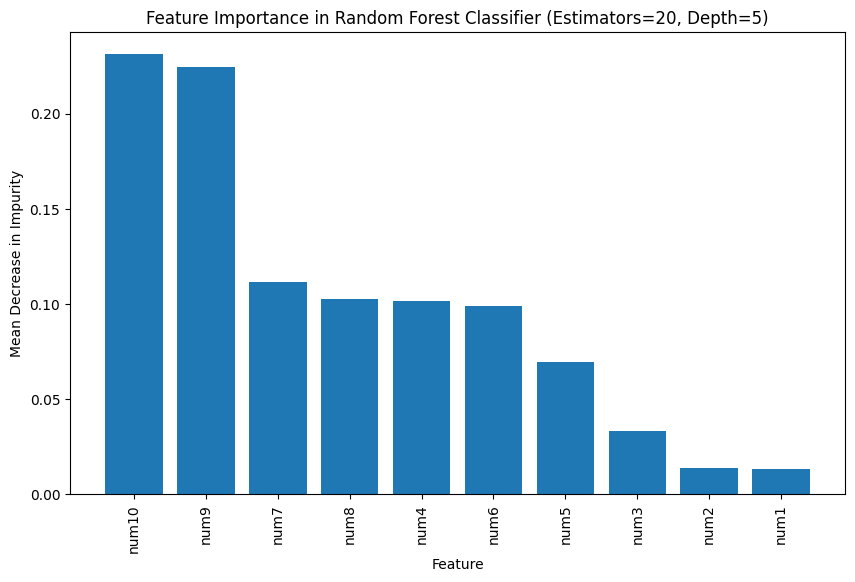

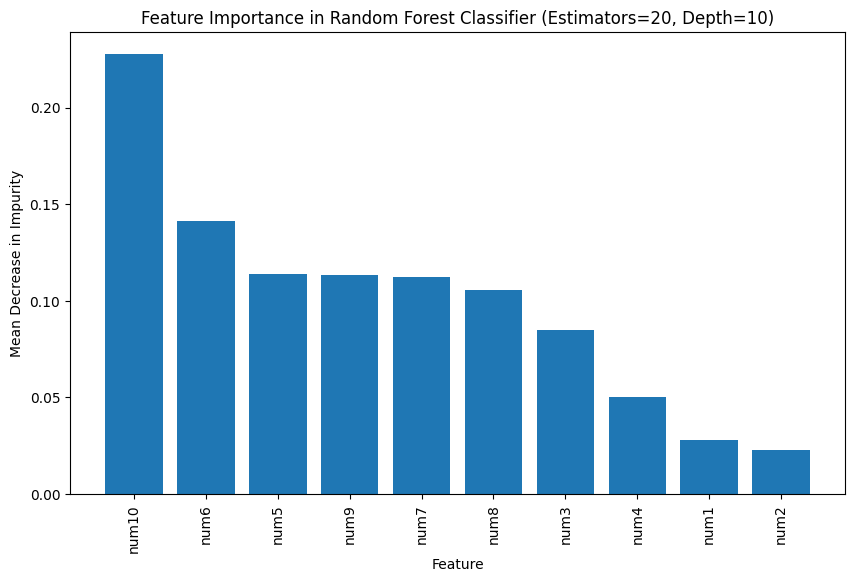

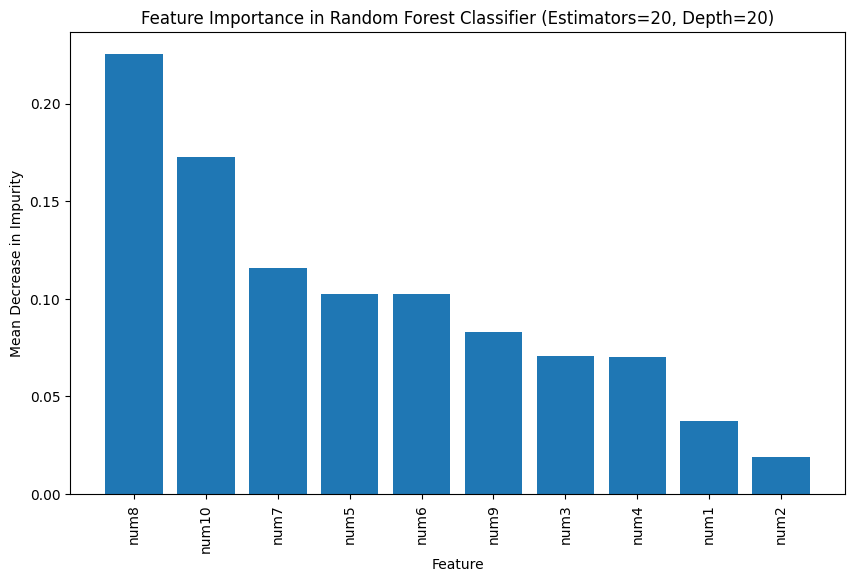

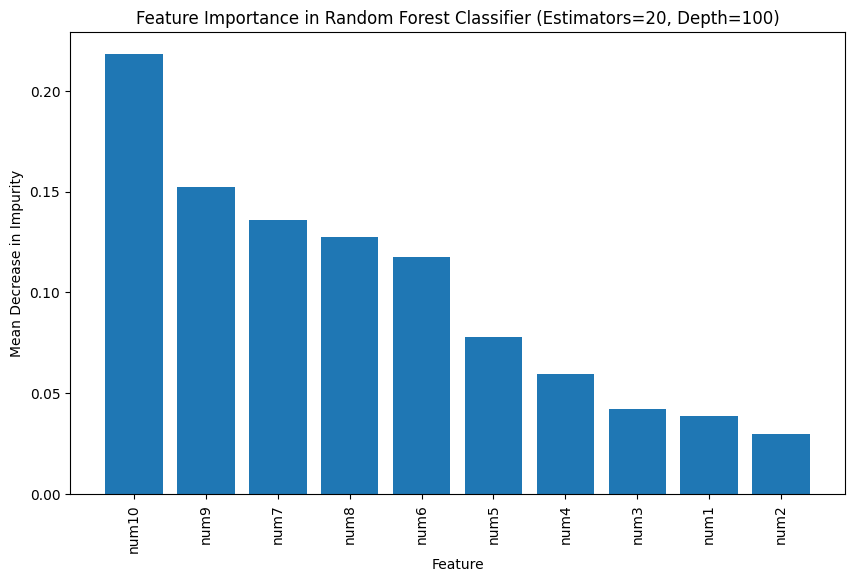

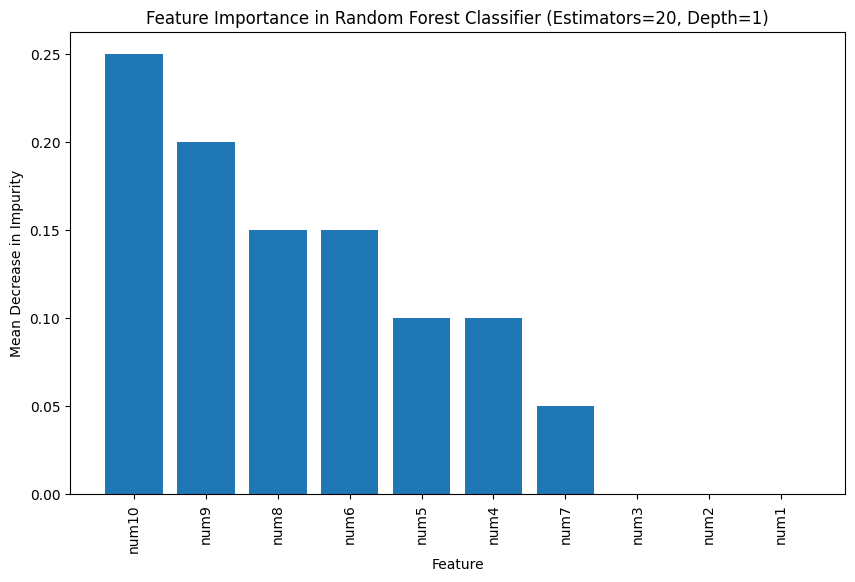

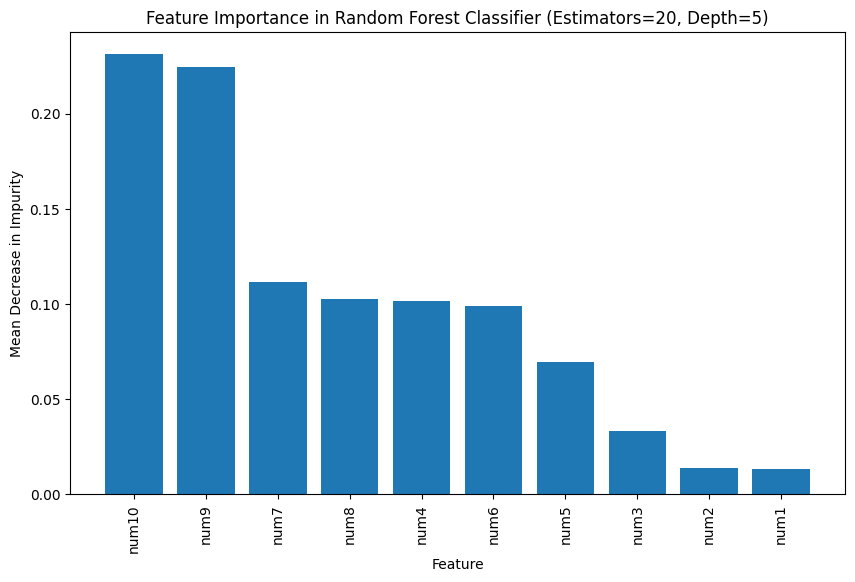

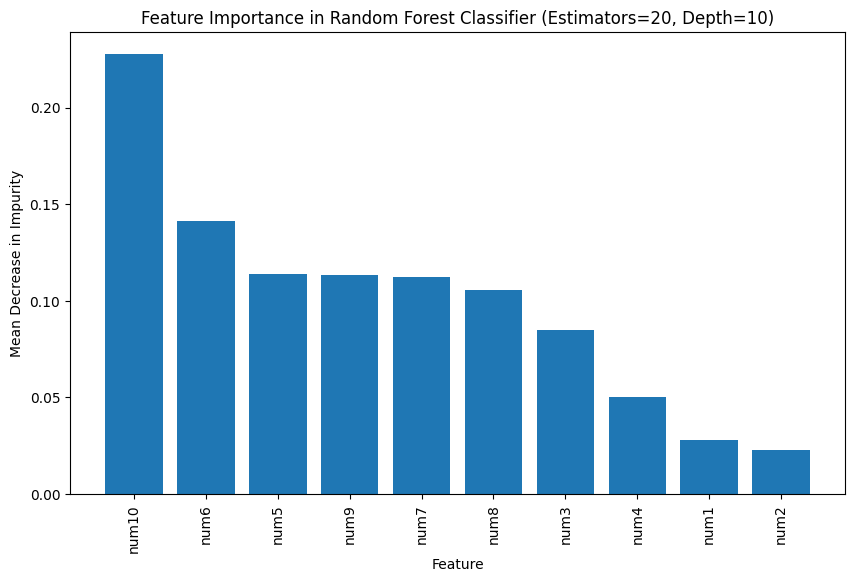

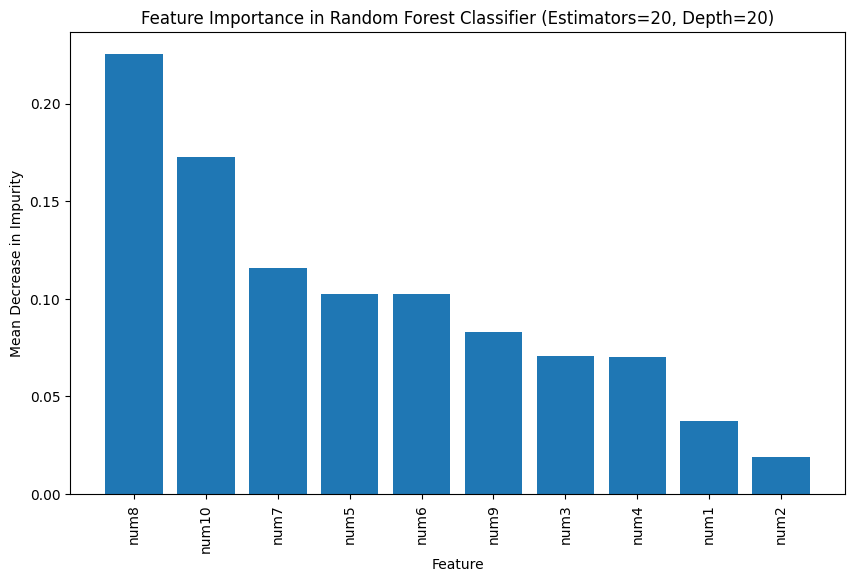

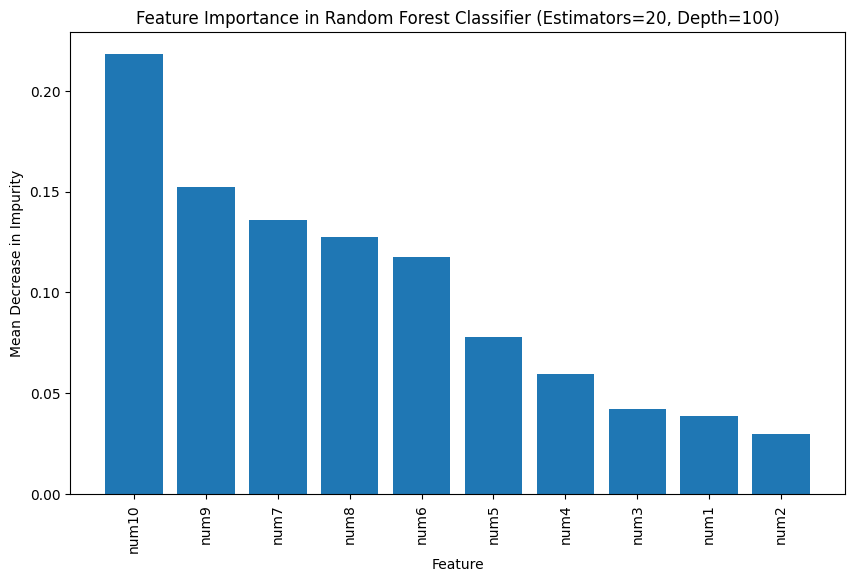

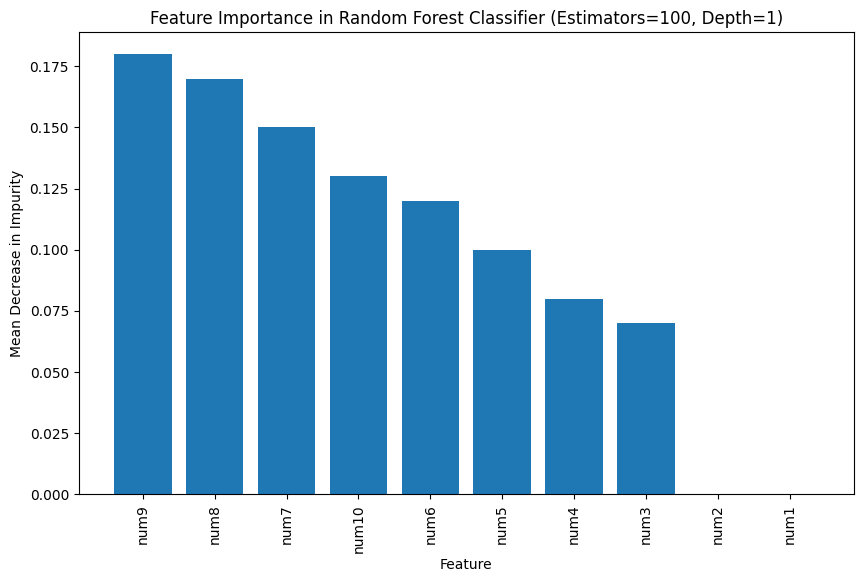

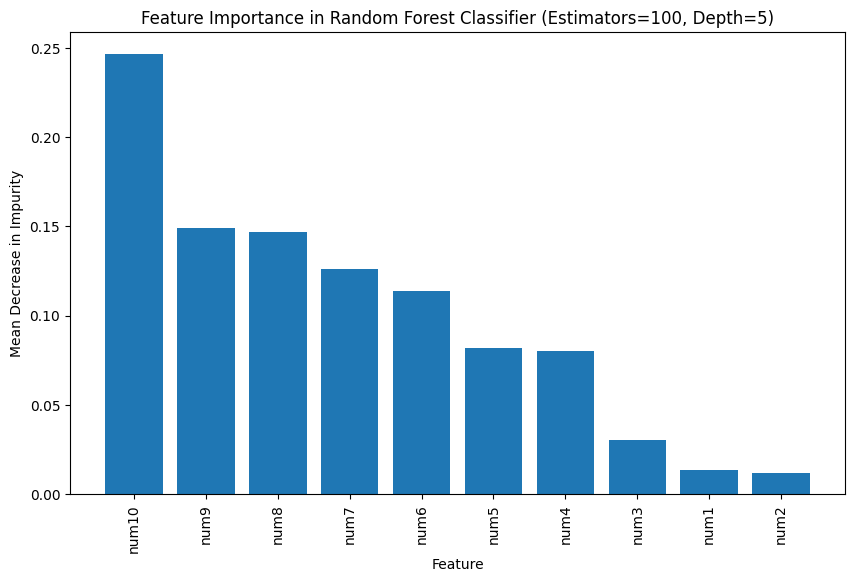

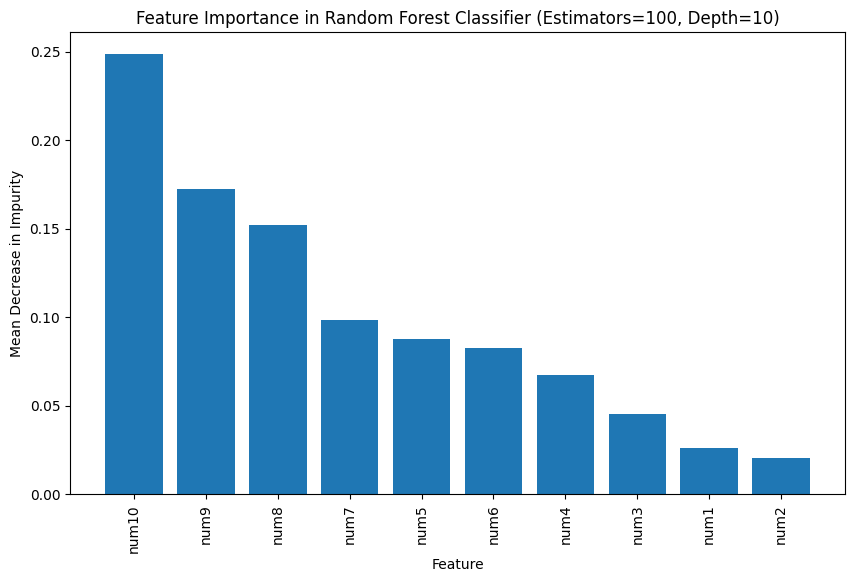

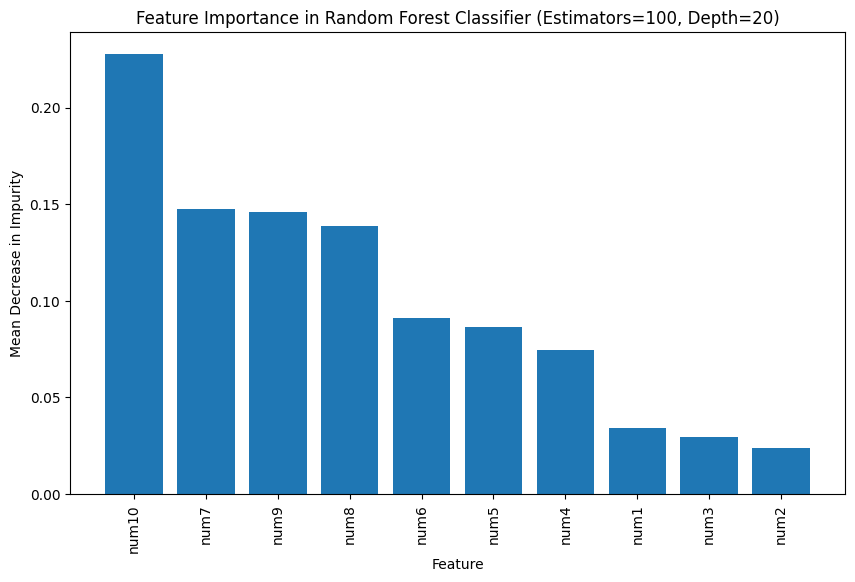

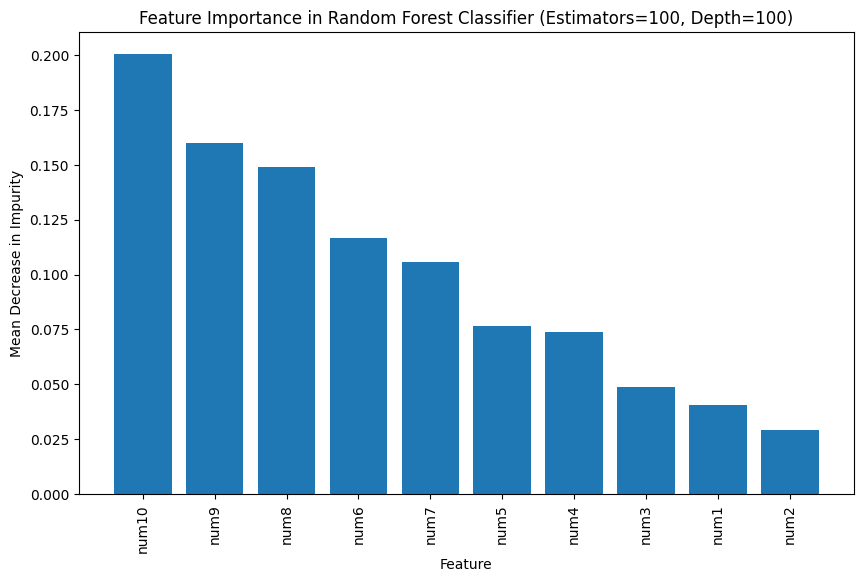

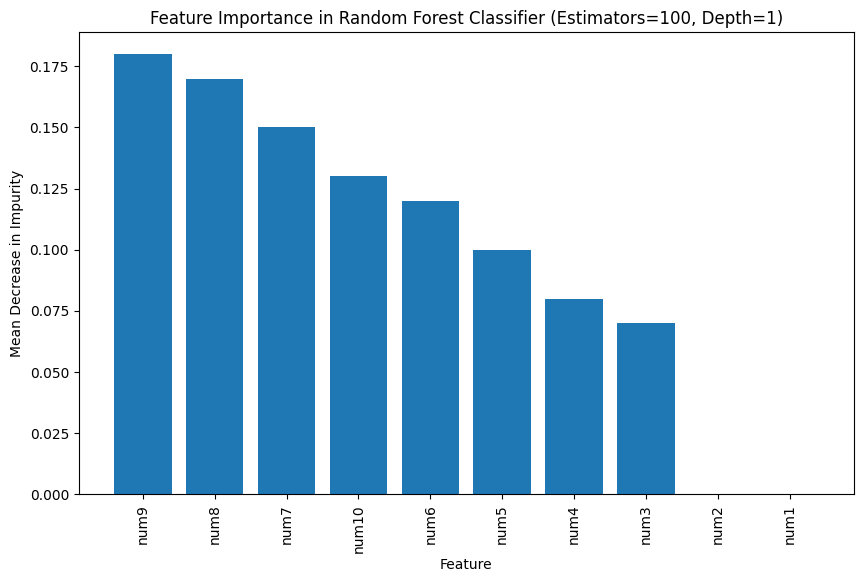

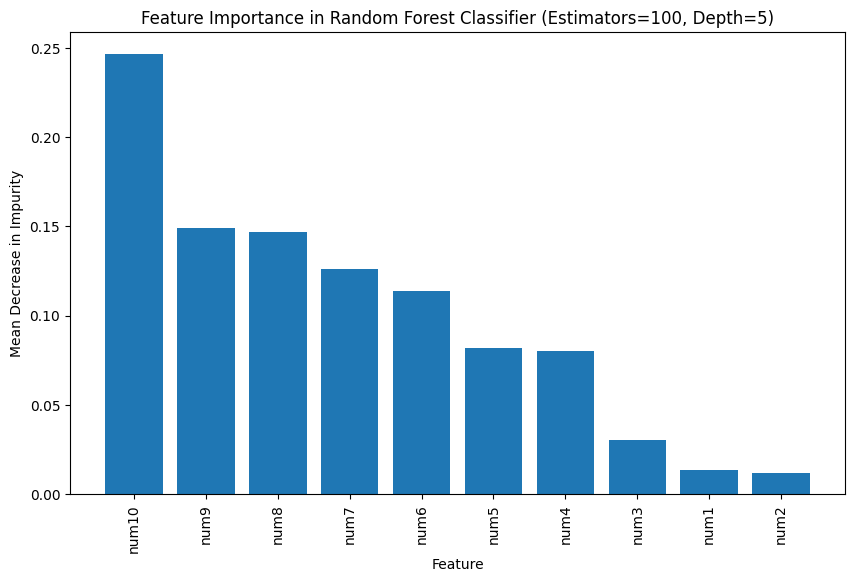

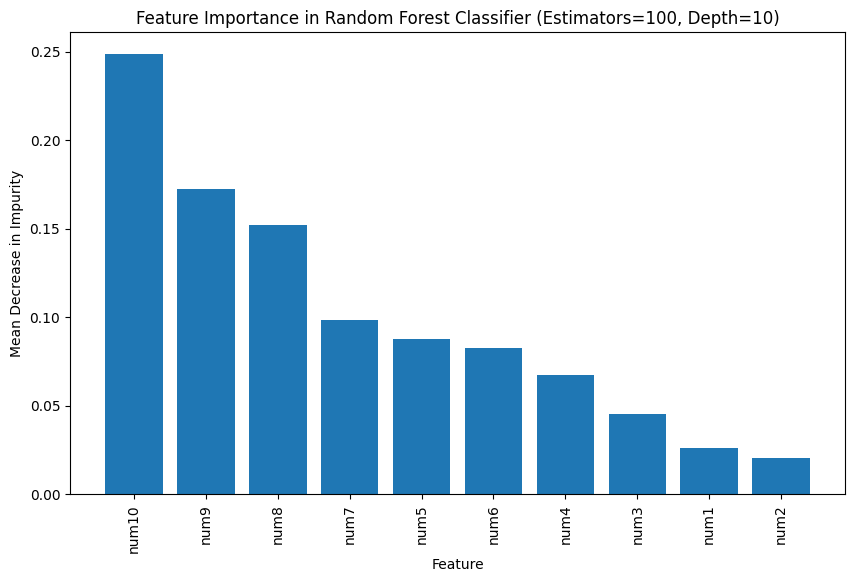

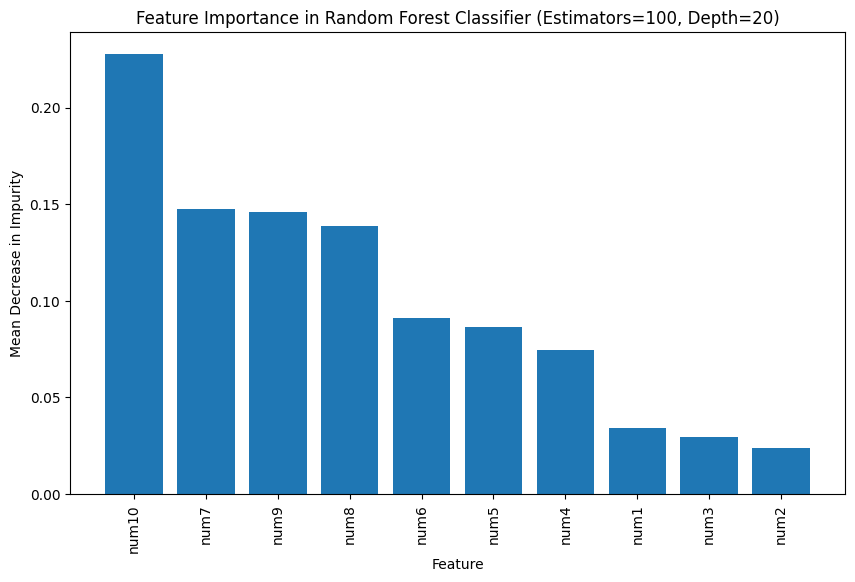

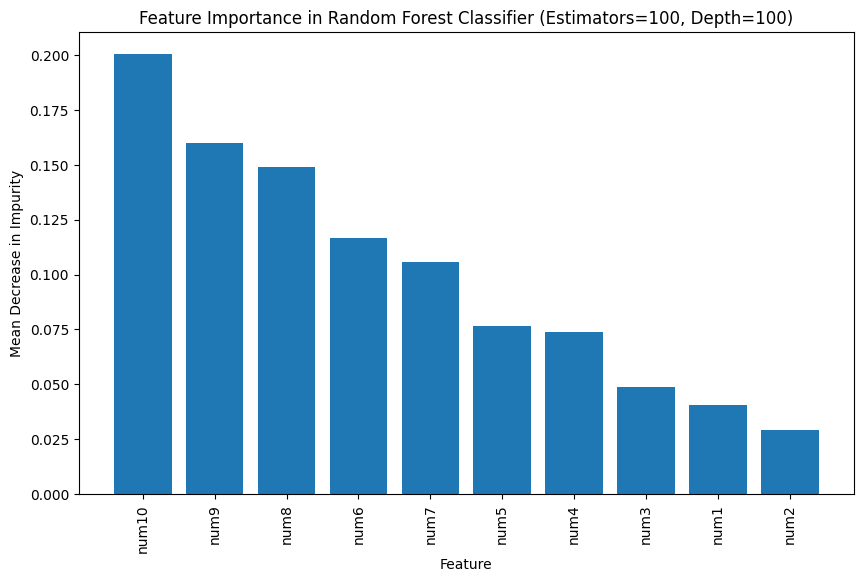

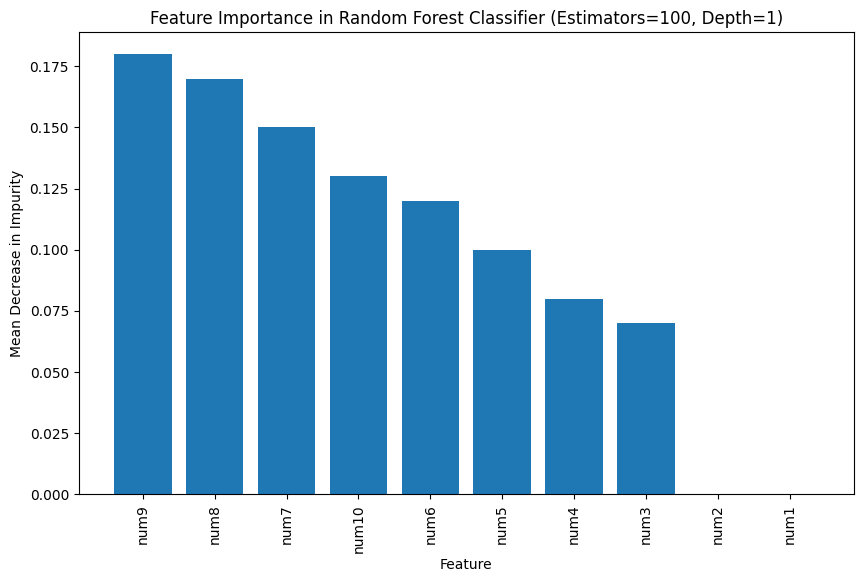

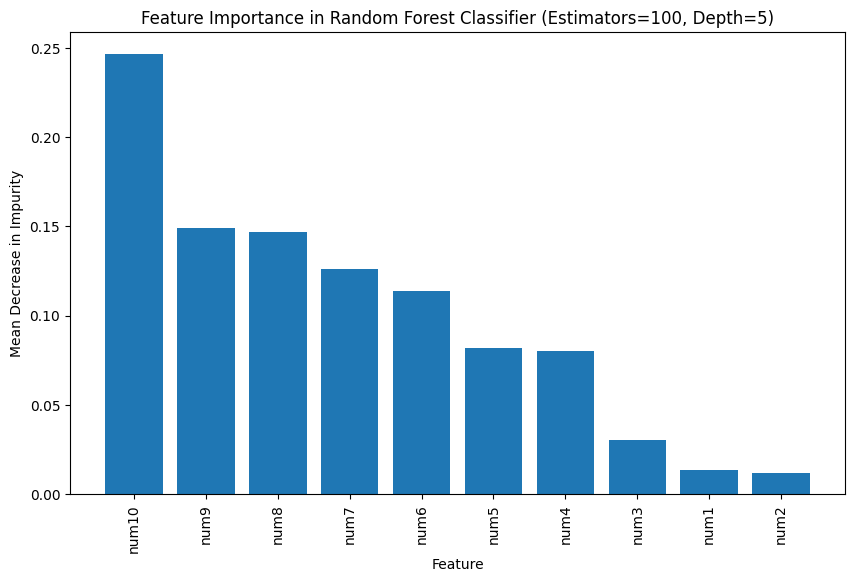

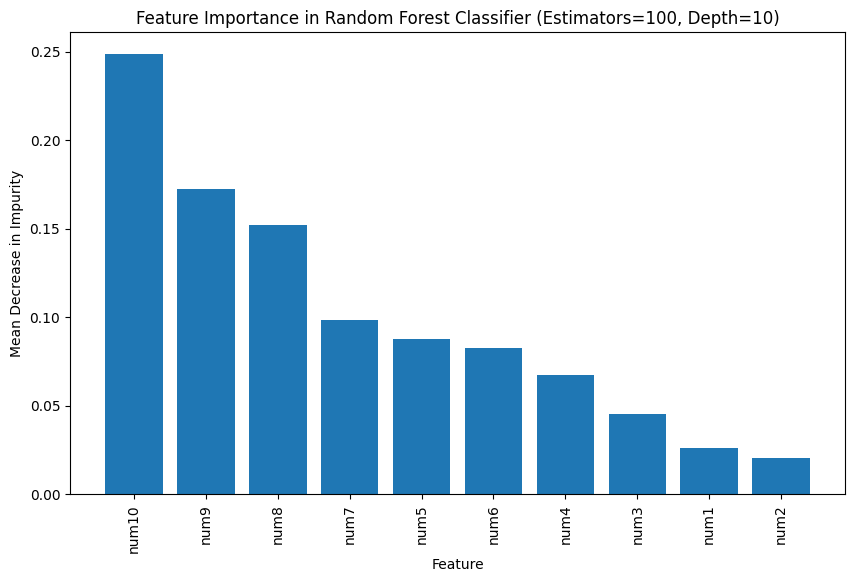

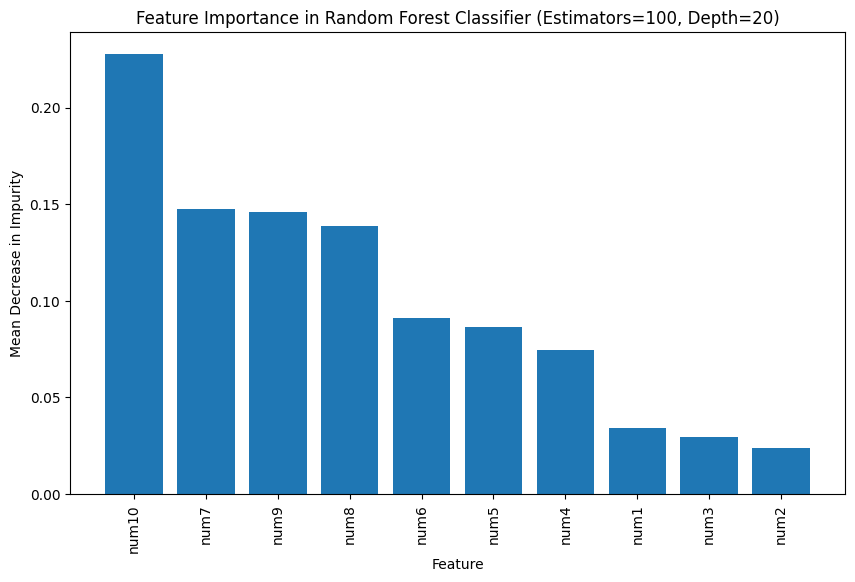

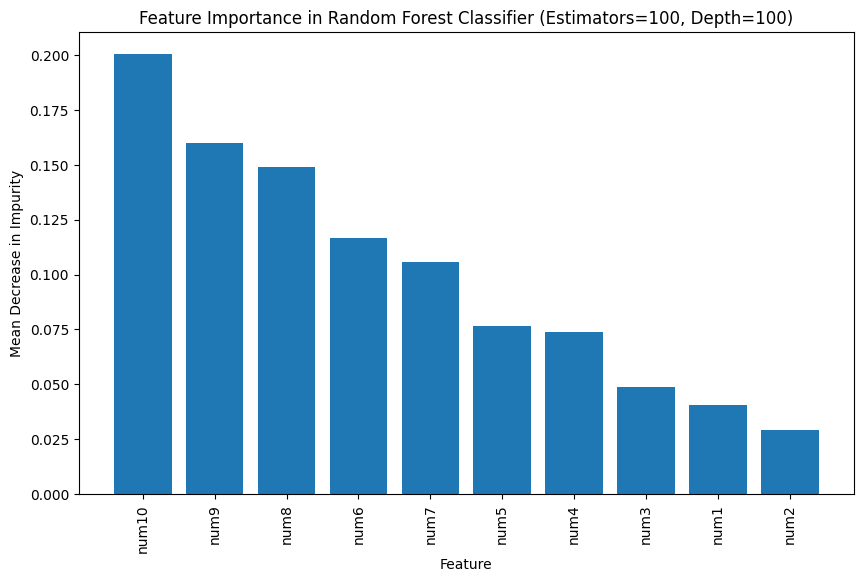

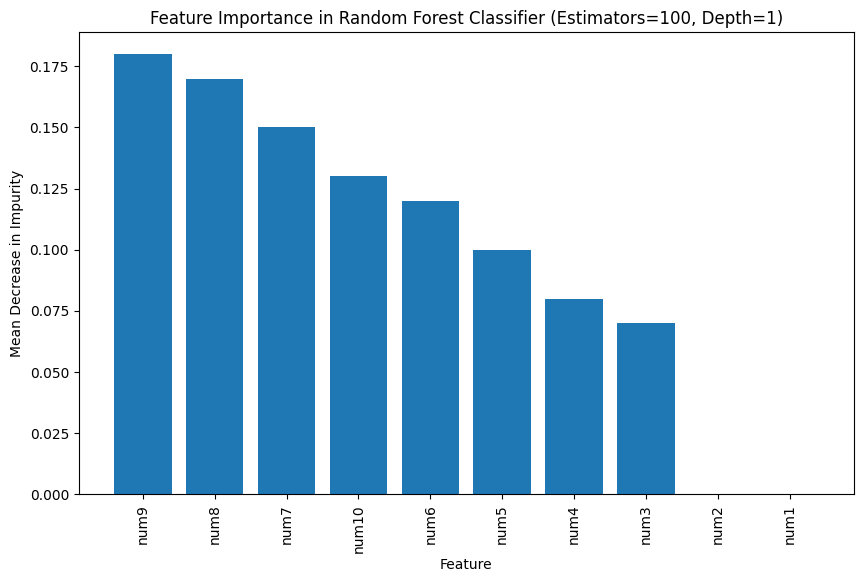

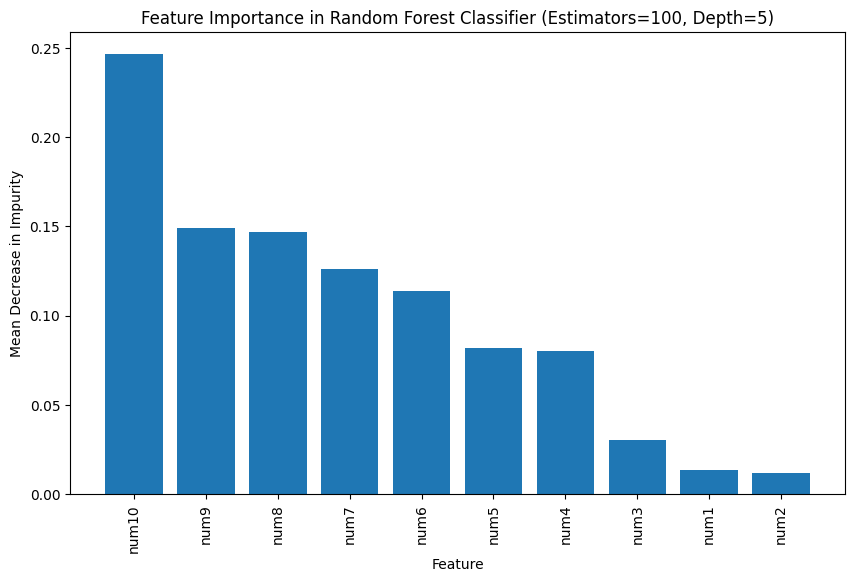

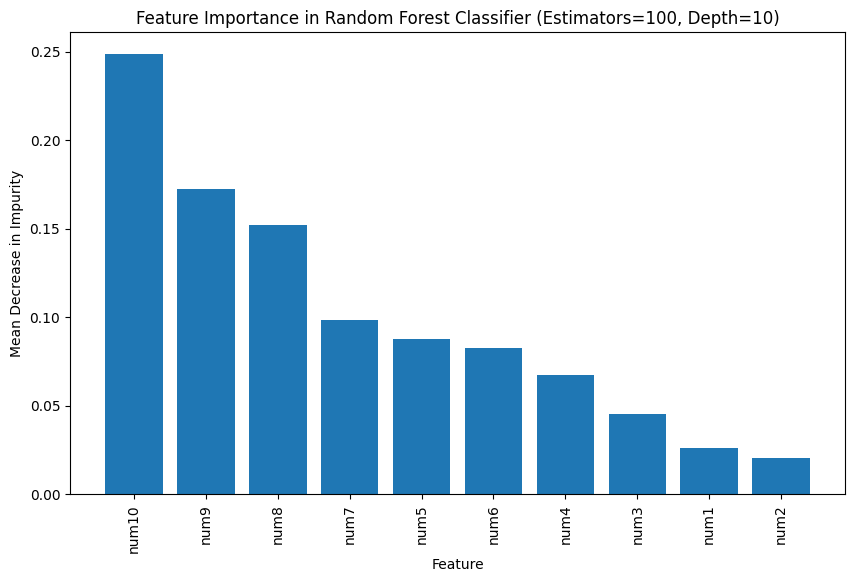

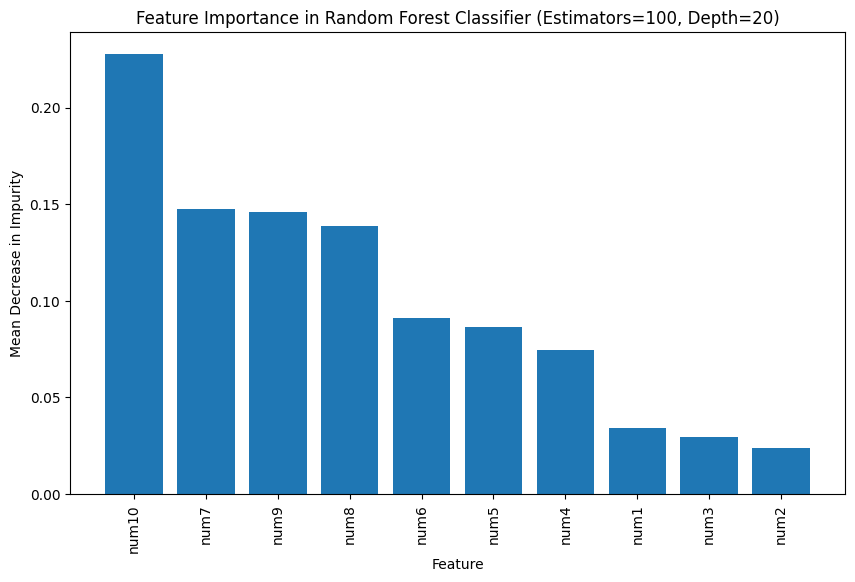

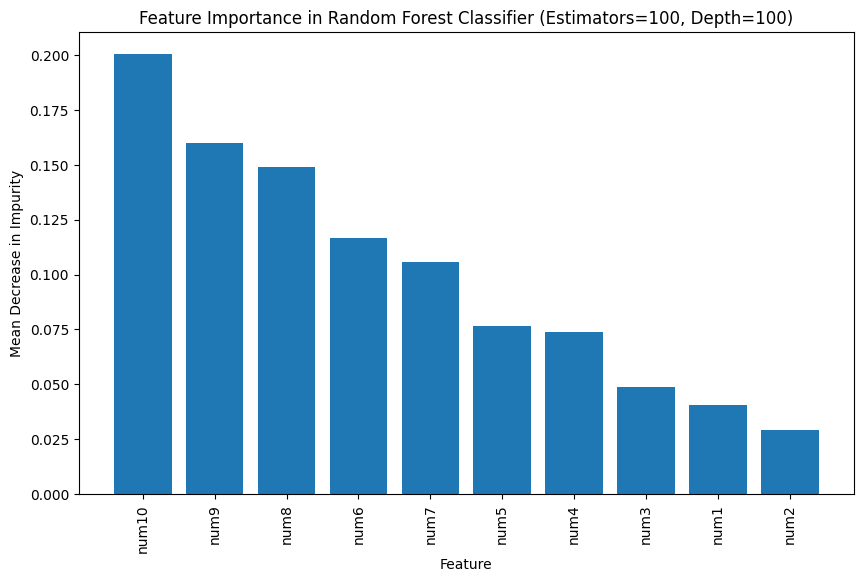

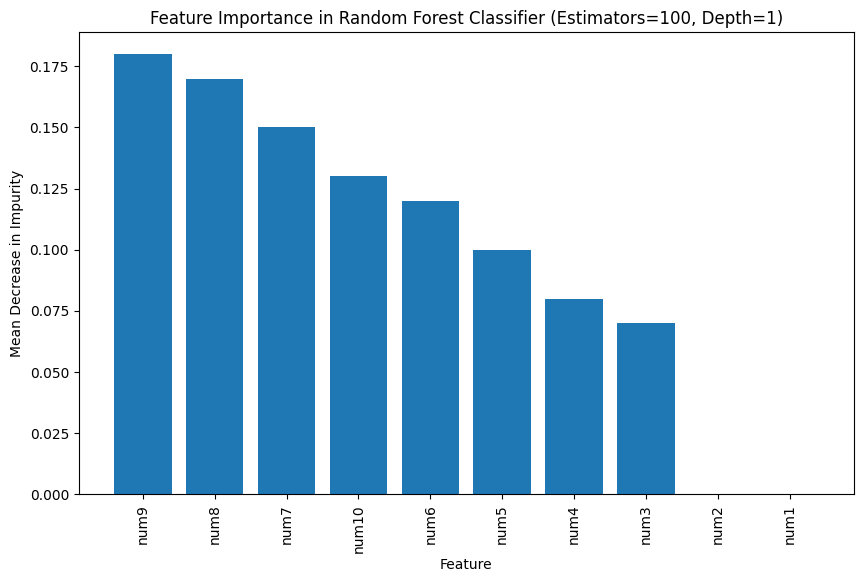

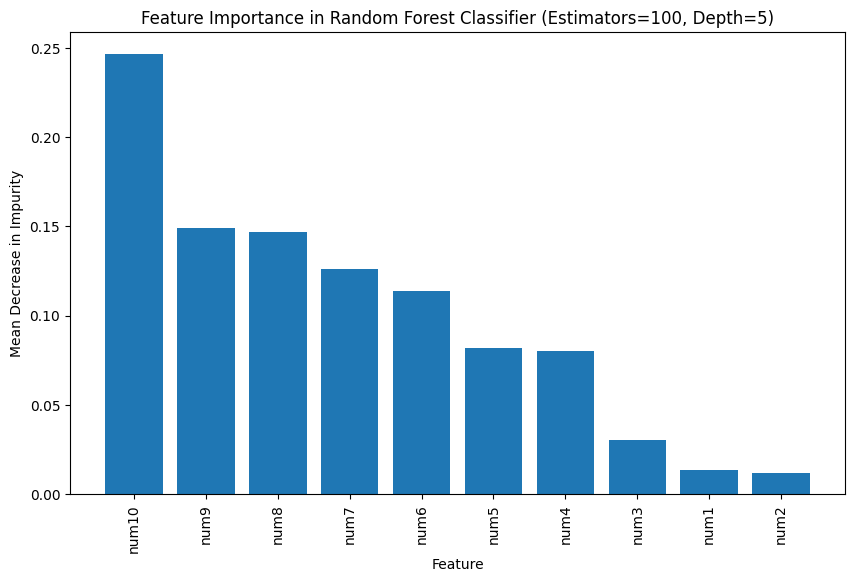

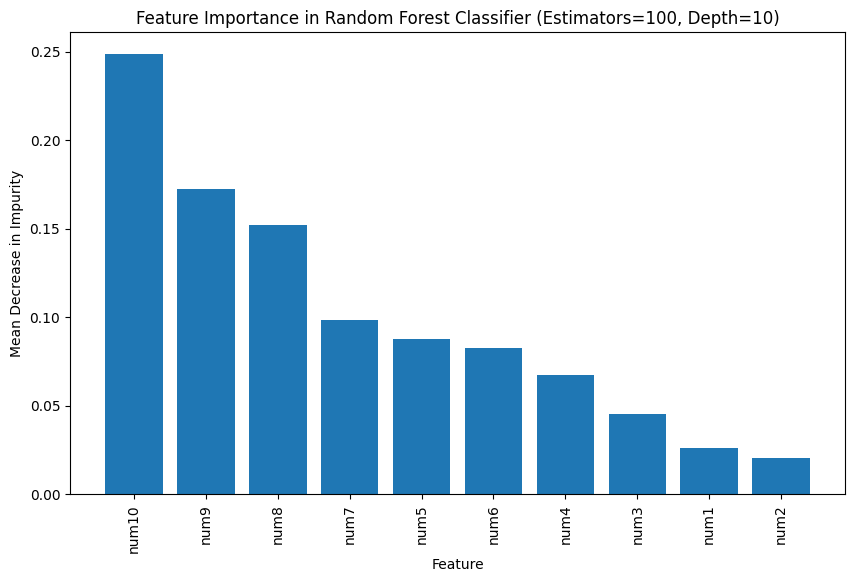

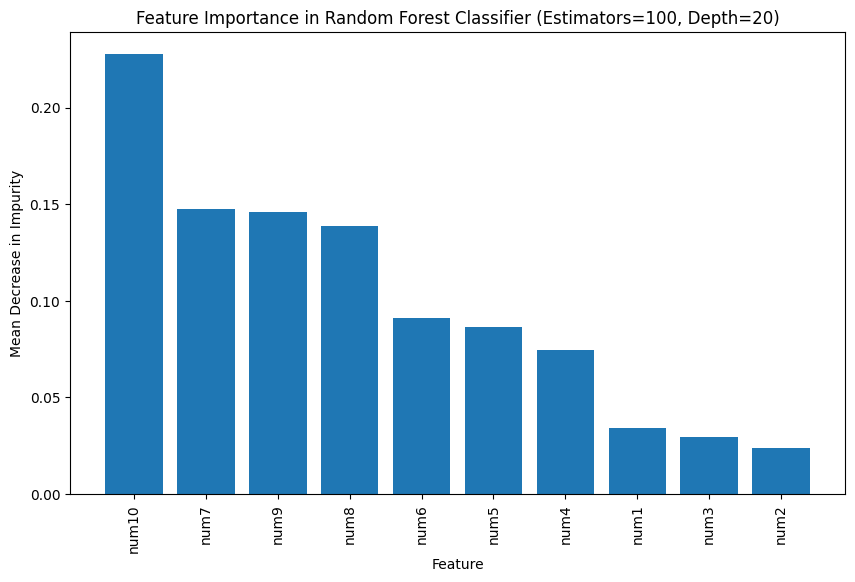

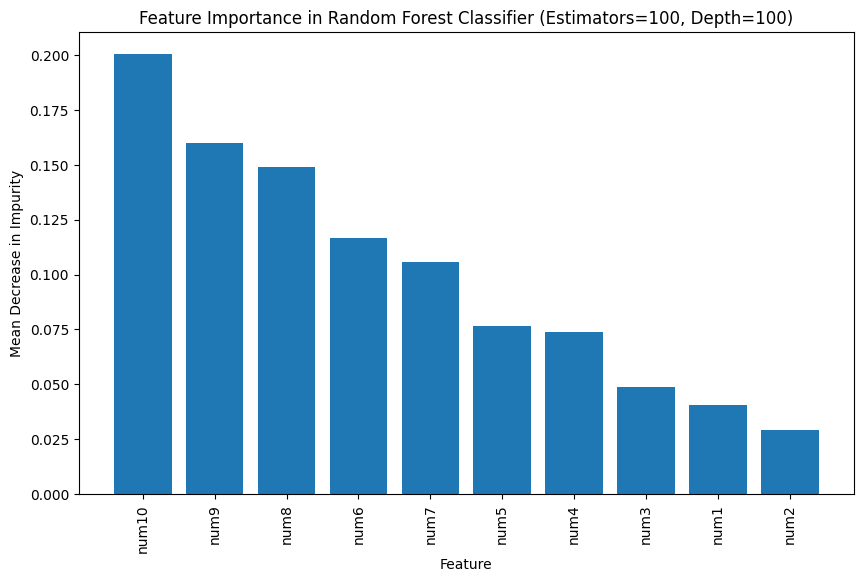

In [13]:
# 3.6 Using Mean Decrease in Impurity, show which feature has the highest importance in prediction

# MDI is used in the function RF_metrics, to return RF_clf_feature_importances in the results_dict. Plotting this below results in:
for estimator in estimators:
    for depth in max_depths:
        feature_importances = results_dict[f'RF_feature_importances_est_{estimator}_depth_{depth}']
        feature_names = X_train.columns
        sorted_indices = np.argsort(feature_importances)[::-1]
        sorted_feature_importances = feature_importances[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances)
        plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
        plt.xlabel('Feature')
        plt.ylabel('Mean Decrease in Impurity')
        plt.title(f'Feature Importance in Random Forest Classifier (Estimators={estimator}, Depth={depth})')
        plt.show()

# 4.1 K-Nearest Neighbours (KNN)

In [14]:
# 4.1 Split the dataset into training (80%) and test set (20%). Consider random effects in splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) 

In [15]:
# Create a general function to train a KNN models at different K values and report their metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def KNN_metrics(y_test, x_test, x_train, y_train, k_value):
    # create the object Normalizer with the classes' methods
    normalizer = Normalizer()
    # Create the object StandardScaler with the classes' methods
    scaler = StandardScaler()
    # Combine the training and test data for normalization
    x_combined = np.vstack((x_train, x_test))
    # Use the methods fit and transform to normalize the combined data
    x_combined_normalized = scaler.fit_transform(x_combined)
    # Split the normalized data back into training and test sets
    x_train_normalized = x_combined_normalized[:len(x_train)]
    x_test_normalized = x_combined_normalized[len(x_train):]


    KNN_model = KNeighborsClassifier(n_neighbors=k_value) 
    # Train the Random Forest tree
    KNN_model.fit(x_train_normalized, y_train)
    
    y_pred = KNN_model.predict(x_test_normalized) # Y_ decision tree_ predictions 

    KNN_accuracy = accuracy_score(y_test, y_pred)
    KNN_precision = precision_score(y_test, y_pred, average='macro')
    KNN_recall = recall_score(y_test, y_pred, average='macro')
    KNN_f1 = f1_score(y_test, y_pred, average='macro')
    KNN_conf_matrix = confusion_matrix(y_test, y_pred,)
    KNN_specificity = KNN_conf_matrix[0,0] / (KNN_conf_matrix[0,0] + KNN_conf_matrix[0,1])

    print(f'Metrics for Neighbours = {k_value}')
    print(f'Accuracy: {KNN_accuracy}')
    print(f'Precision: {KNN_precision}')
    print(f'Recall: {KNN_recall}')
    print(f'F1-score: {KNN_f1}')
    print(f'Confusion Matrix:\n{KNN_conf_matrix}')
    print(f'Specificity: {KNN_specificity}')

    return KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_conf_matrix, KNN_specificity, KNN_model

In [16]:
#4.2 / 4.4 Train 10 different KNN classifiers with K = [1,2,3,4,5,6,7,8,9,10]
K = [1,2,3,4,5,6,7,8,9,10]
KNN_accuaracy_list = []
for k_value in K:
    # Call the KNN_metrics function
    KNN_accuracy, _, _, _, _, _, _ = KNN_metrics(Y_test, X_test, X_train, Y_train, k_value)
    
    # Store the accuracy in the results dictionary
    KNN_accuaracy_list.append(KNN_accuracy)

Metrics for Neighbours = 1
Accuracy: 0.96868
Precision: 0.9727834730848082
Recall: 0.9687247659054613
F1-score: 0.9685342196041222
Confusion Matrix:
[[19909     0     0     0     0]
 [    2 16936     2  3087     0]
 [    2    22 20129     0    13]
 [    0     4     0 20020     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Neighbours = 2
Accuracy: 0.96801
Precision: 0.9719141608444298
Recall: 0.9680563365997775
F1-score: 0.9678713555420145
Confusion Matrix:
[[19909     0     0     0     0]
 [    3 16940     0  3084     0]
 [    2    33 20118     0    13]
 [    0    64     0 19960     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metrics for Neighbours = 3
Accuracy: 0.93717
Precision: 0.951117106203706
Recall: 0.9372597041789053
F1-score: 0.9357921952504495
Confusion Matrix:
[[19909     0     0     0     0]
 [    3 13882     0  6142     0]
 [    2    32 20092     1    39]
 [    0    64     0 19960     0]
 [    0     0     0     0 19874]]
Specificity: 1.0
Metri

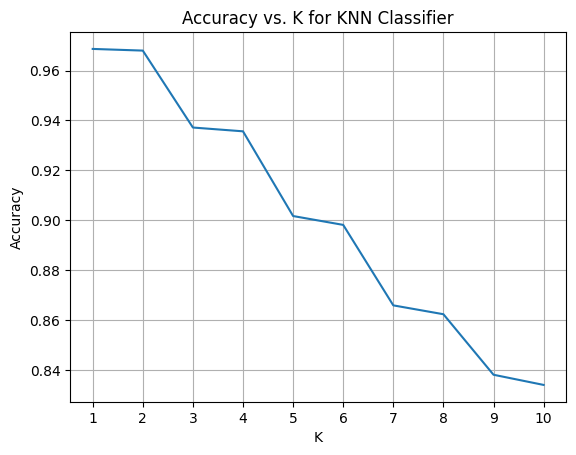

In [17]:
# 4.5: Compare the accuracy of your trained models by plotting accuracy versus K (horizontal axis: K, vertical axis: accuracy). Which K resulted in the highest accuracy? Discuss the results.
plt.plot(K, KNN_accuaracy_list)
plt.xlabel('K')
plt.xticks(np.linspace(1,10, 10))
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K for KNN Classifier')
plt.grid(True)
plt.show()


# 5. Support Vector Classifier

In [18]:
#5.1 Split the dataset into 80% training and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42) # Not sure how to consider random effects in splitting the data tbh


In [19]:
#5.2 Train a support vector classifier on the train set where C = 10000 and kernel is "rbf" and use a normalizer to normalize your features. Were you able to train the model?
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
normalizer = Normalizer()
x_train_normalized = normalizer.fit_transform(X_train)
x_test_normalized = normalizer.transform(X_test)

#svc = SVC(C=10000, kernel='rbf')

#svc.fit(x_train_normalized, y_train)

#y_pred = svc.predict(x_test_normalized)

#accuracy = accuracy_score(Y_test, y_pred)

#print(accuracy)

 # It doesn't run! After 1hr nothing happened. It is too large of a data set. We must create batches!

In [20]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
import pickle
import statistics
import math
import time
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

def SVM_Chunk(Data, chunk_number, c_value):
    start_time = time.time()
    Data= Data.dropna()
    train_set_Map, test_set= train_test_split(Data, test_size=0.2, random_state=42)
    Data_Map = train_set_Map.copy()
    Data_test_R= test_set.drop(["Robot"], axis=1)
    Data_labels_test_R= test_set["Robot"].copy()
    #chunk_number=20
    chunk_size =math.ceil(len(Data_Map)/chunk_number)
    data_chunked={}
    m=0
    for i in range(0, len(Data_Map), chunk_size):
        if m==chunk_number-1:
            chunk_size= len(Data_Map)- m *chunk_size
        data_chunked[str("chunk"+str(m))] = Data_Map[i:i+chunk_size]
        print(str("chunk"+str(m)), chunk_size)
        m=m+1

    for i in range(0,chunk_number):
        Data_M = data_chunked[str("chunk"+str(i))].drop(["Robot"], axis=1)
        Data_labels_M = data_chunked[str("chunk"+str(i))]["Robot"].copy()
        SVMC = Pipeline(steps=[('Normal', Normalizer()), ('SVMC',
        SVC(C=c_value, kernel='rbf'))])
        SVMC.fit(Data_M,Data_labels_M)
        pickle.dump(SVMC, open('SVMC.pkstr(i)', 'wb'))
        print(i)
    OUT_SVMC={}
    store = [[0 for col in range(chunk_number)] for row in
    range(len(Data_test_R))]
    Lables_SVMC_predicted=[[0 for col in range(1)] for row in
    range(len(Data_test_R))]
    for i in range(0, chunk_number):
        SVMC1 = pickle.load(open('SVMC.pkstr(i)', 'rb'))
        OUT_SVMC[str("chunk"+str(i))]=SVMC1.predict(Data_test_R)
        print(i)
        
    for j in range(0,len(Data_test_R)):
        for i in range(0,chunk_number):
            store[j][i]=OUT_SVMC[str("chunk"+str(i))][j]
        Lables_SVMC_predicted[j]=statistics.mode(store[j])
    
    y_pred = SVMC.predict(Data_test_R)
    y_test = Data_labels_test_R
    SVM_accuracy = accuracy_score(y_test, y_pred)
    SVM_precision = precision_score(y_test, y_pred, average='macro')
    SVM_recall = recall_score(y_test, y_pred, average='macro')
    SVM_f1 = f1_score(y_test, y_pred, average='macro')
    SVM_conf_matrix = confusion_matrix(y_test, y_pred,)
    SVM_specificity = SVM_conf_matrix[0,0] / (SVM_conf_matrix[0,0] + SVM_conf_matrix[0,1])
    end_time = time.time()
    SVM_computation_time = end_time - start_time
    
    print(f'Metrics for C = {c_value} and Number of Chunks = {chunk_number}')
    print(f'Accuracy: {SVM_accuracy}')
    print(f'Precision: {SVM_precision}')
    print(f'Recall: {SVM_recall}')
    print(f'F1-score: {SVM_f1}')
    print(f'Confusion Matrix:\n{SVM_conf_matrix}')
    print(f'Specificity: {SVM_specificity}')
    print(f"Computation Time: {end_time - start_time}")
    return SVM_accuracy, SVM_precision, SVM_recall, SVM_f1, SVM_conf_matrix, SVM_specificity, SVM_computation_time


In [21]:
# Iterate through different chunk sizes and C values
chunk_sizes = [10, 20, 40]
chunk_size_results = {}
for chunk_size in chunk_sizes:
    c_value = 1000000
    accuracy_SVM, precision, recall, f1, conf_matrix, specificity, computation_time = SVM_Chunk(conv_df,chunk_size, c_value)
    chunk_size_results[f"Chunk Size: {chunk_size}, C: {c_value}"] = {
            "Accuracy": accuracy_SVM,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": conf_matrix,
            "Specificity": specificity,
            "Computation Time": computation_time
        }
C_values = [1, 10, 100, 1000, 10000, 100000, 1000000]
c_value_results = {}
for c_value in C_values:
    chunk_size = 20
    accuracy_SVM, precision, recall, f1, conf_matrix, specificity, computation_time = SVM_Chunk(conv_df,chunk_size, c_value)
    chunk_size_results[f"Chunk Size: {chunk_size}, C: {c_value}"] = {
            "Accuracy": accuracy_SVM,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "Confusion Matrix": conf_matrix,
            "Specificity": specificity,
            "Computation Time": computation_time
        }

chunk0 40000
chunk1 40000
chunk2 40000
chunk3 40000
chunk4 40000
chunk5 40000
chunk6 40000
chunk7 40000
chunk8 40000
chunk9 40000
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
Metrics for C = 1000000 and Number of Chunks = 10
Accuracy: 0.81174
Precision: 0.8298210113176779
Recall: 0.8119781060780931
F1-score: 0.7810611476012366
Confusion Matrix:
[[19902     7     0     0     0]
 [    0 18242     0  1785     0]
 [    0     0 20021     0   145]
 [    0 16889     0  3135     0]
 [    0     0     0     0 19874]]
Specificity: 0.9996484002210055
Computation Time: 1447.8063299655914
chunk0 20000
chunk1 20000
chunk2 20000
chunk3 20000
chunk4 20000
chunk5 20000
chunk6 20000
chunk7 20000
chunk8 20000
chunk9 20000
chunk10 20000
chunk11 20000
chunk12 20000
chunk13 20000
chunk14 20000
chunk15 20000
chunk16 20000
chunk17 20000
chunk18 20000
chunk19 20000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Metrics for C = 1000000 and Number of Chunks = 20
Acc

In [22]:
chunk_size_results

{'Chunk Size: 10, C: 1000000': {'Accuracy': 0.81174,
  'Precision': 0.8298210113176779,
  'Recall': 0.8119781060780931,
  'F1 Score': 0.7810611476012366,
  'Confusion Matrix': array([[19902,     7,     0,     0,     0],
         [    0, 18242,     0,  1785,     0],
         [    0,     0, 20021,     0,   145],
         [    0, 16889,     0,  3135,     0],
         [    0,     0,     0,     0, 19874]], dtype=int64),
  'Specificity': 0.9996484002210055,
  'Computation Time': 1447.8063299655914},
 'Chunk Size: 20, C: 1000000': {'Accuracy': 0.80839,
  'Precision': 0.8244797005353217,
  'Recall': 0.8086341399344199,
  'F1 Score': 0.7754036862273427,
  'Confusion Matrix': array([[19893,    16,     0,     0,     0],
         [    0, 18285,     0,  1742,     0],
         [    0,     0, 19984,     0,   182],
         [    0, 17221,     0,  2803,     0],
         [    0,     0,     0,     0, 19874]], dtype=int64),
  'Specificity': 0.9991963433622985,
  'Computation Time': 1481.239767074585},
 'C

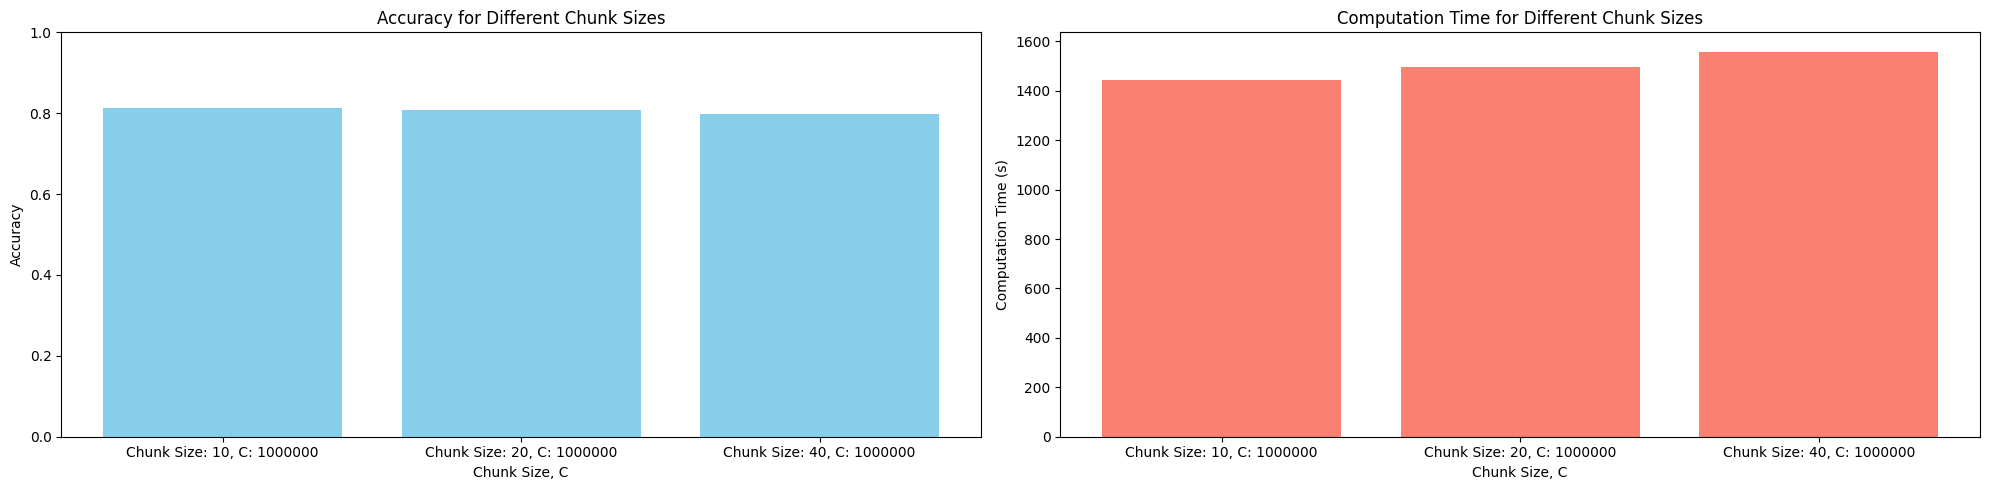

(0.7, 1.0)

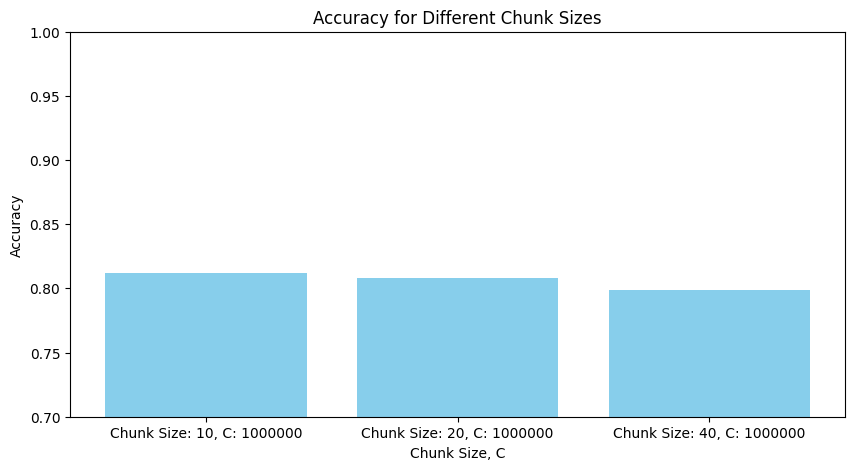

In [ ]:
# Extracting accuracy and computation time for each chunk size
chunk_sizes = ['Chunk Size: 10, C: 1000000', 'Chunk Size: 20, C: 1000000', 'Chunk Size: 40, C: 1000000']
accuracies = [chunk_size_results[chunk]['Accuracy'] for chunk in chunk_sizes]
computation_times = [chunk_size_results[chunk]['Computation Time'] for chunk in chunk_sizes]

# Plotting the bar graphs
plt.figure(figsize=(20, 5))

# Bar graph for accuracy
plt.subplot(1, 2, 1)
plt.bar(chunk_sizes, accuracies, color='skyblue')
plt.title('Accuracy for Different Chunk Sizes')
plt.xlabel('Chunk Size, C')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Bar graph for computation time
plt.subplot(1, 2, 2)
plt.bar(chunk_sizes, computation_times, color='salmon')
plt.title('Computation Time for Different Chunk Sizes')
plt.xlabel('Chunk Size, C')
plt.ylabel('Computation Time (s)')

plt.tight_layout()
plt.show()

# Bar graph for accuracy
plt.figure(figsize=(10, 5))

plt.bar(chunk_sizes, accuracies, color='skyblue')
plt.title('Accuracy for Different Chunk Sizes')
plt.xlabel('Chunk Size, C')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1)

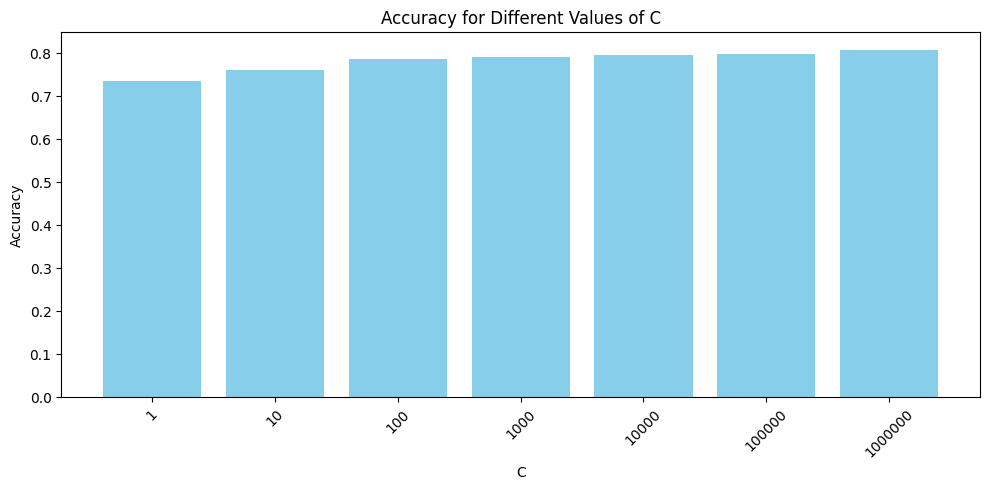

In [ ]:
# Extracting accuracy for each C value
C_values = [1, 10, 100, 1000, 10000, 100000, 1000000]
accuracies_c_values = [chunk_size_results[f'Chunk Size: 20, C: {C}']['Accuracy'] for C in C_values]

# Plotting the bar graph
plt.figure(figsize=(10, 5))
plt.bar(range(len(C_values)), accuracies_c_values, color='skyblue')
plt.title('Accuracy for Different Values of C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(C_values)), C_values, rotation=45)
plt.tight_layout()
plt.show()

# 6. Comparison between the mentioned Models

In [33]:
accuracy

{'RF_accuracy_est_1_depth_1': 0.39901,
 'RF_accuracy_est_1_depth_5': 0.75173,
 'RF_accuracy_est_1_depth_10': 0.77338,
 'RF_accuracy_est_1_depth_20': 0.79492,
 'RF_accuracy_est_1_depth_100': 0.81475,
 'RF_accuracy_est_10_depth_1': 0.5981,
 'RF_accuracy_est_10_depth_5': 0.76249,
 'RF_accuracy_est_10_depth_10': 0.78397,
 'RF_accuracy_est_10_depth_20': 0.81001,
 'RF_accuracy_est_10_depth_100': 0.88217,
 'RF_accuracy_est_20_depth_1': 0.5981,
 'RF_accuracy_est_20_depth_5': 0.75525,
 'RF_accuracy_est_20_depth_10': 0.78492,
 'RF_accuracy_est_20_depth_20': 0.80756,
 'RF_accuracy_est_20_depth_100': 0.93323,
 'RF_accuracy_est_100_depth_1': 0.59807,
 'RF_accuracy_est_100_depth_5': 0.75636,
 'RF_accuracy_est_100_depth_10': 0.79338,
 'RF_accuracy_est_100_depth_20': 0.84249,
 'RF_accuracy_est_100_depth_100': 0.98614}

In [45]:
chunk_size_results['Chunk Size: 10, C: 1000000']["Accuracy"]

0.81174

In [52]:
chunk_size_results['Chunk Size: 10, C: 1000000']["Accuracy"]

0.81174

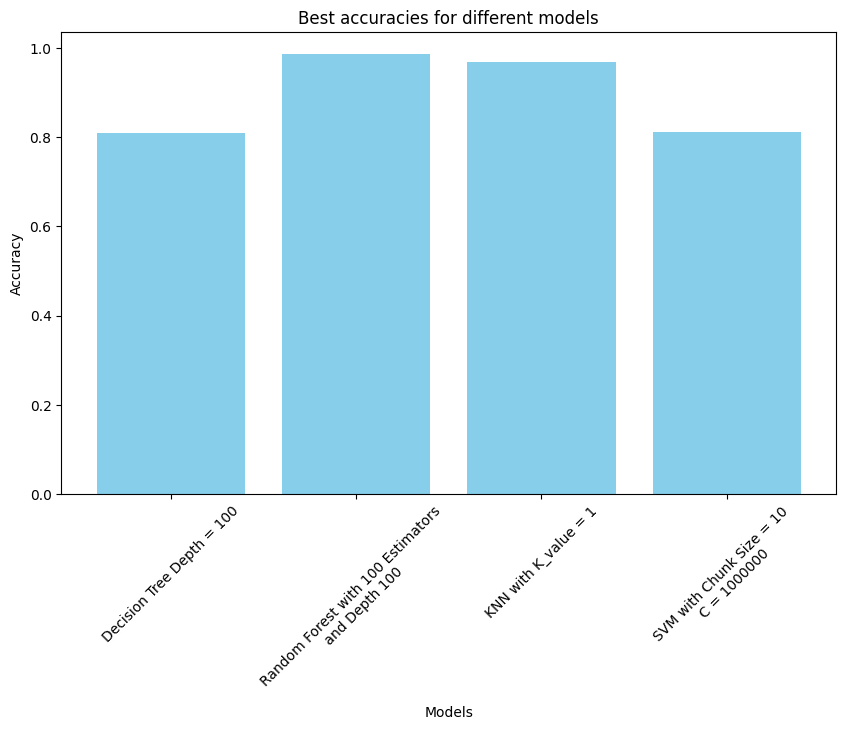

In [48]:
# The best accuracy for section 2 was, Decision Tree (DT) at Depth 100: DT_accuracy_depth_100
# Best accuracy for section 3, RF, at depth 100 with 100 estimators: list(accuracy.keys)
# Best accuracy for section 4, KNN, was at K = 1, KNN_accuaracy_list[0] (0.969)
# Best accuracy for section 5, SVM, chunk size = 10, C = 1000000, list(chunk_size_results.keys)

best_accuracies = [DT_accuracy_depth_100, accuracy["RF_accuracy_est_100_depth_100"], KNN_accuaracy_list[0], chunk_size_results['Chunk Size: 10, C: 1000000']["Accuracy"]]
categories = ["Decision Tree Depth = 100", "Random Forest with 100 Estimators\n and Depth 100", "KNN with K_value = 1", "SVM with Chunk Size = 10\n C = 1000000"]

plt.figure(figsize=(10, 6))
plt.bar(categories, best_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Best accuracies for different models')
plt.xticks(rotation=45)
plt.show()